In [3]:
! python train.py --input_length 5

Setting total_len to the maximum possible length. 
Epoch [1/1000], Train Loss: 12.9442, Train Accuracy: 0.15, Val Loss: 11.2294, Val Accuracy: 0.18
Epoch [2/1000], Train Loss: 9.9478, Train Accuracy: 0.20, Val Loss: 9.2670, Val Accuracy: 0.20
Epoch [3/1000], Train Loss: 8.4901, Train Accuracy: 0.23, Val Loss: 7.8750, Val Accuracy: 0.28
Epoch [4/1000], Train Loss: 7.1682, Train Accuracy: 0.25, Val Loss: 7.5825, Val Accuracy: 0.28
Epoch [5/1000], Train Loss: 6.7139, Train Accuracy: 0.28, Val Loss: 6.8693, Val Accuracy: 0.32
Epoch [6/1000], Train Loss: 6.1730, Train Accuracy: 0.29, Val Loss: 6.9047, Val Accuracy: 0.28
Epoch [7/1000], Train Loss: 5.8594, Train Accuracy: 0.30, Val Loss: 7.1840, Val Accuracy: 0.22
Epoch [8/1000], Train Loss: 5.5694, Train Accuracy: 0.35, Val Loss: 5.0065, Val Accuracy: 0.34
Epoch [9/1000], Train Loss: 5.1604, Train Accuracy: 0.32, Val Loss: 5.3812, Val Accuracy: 0.33
Epoch [10/1000], Train Loss: 4.9994, Train Accuracy: 0.35, Val Loss: 5.6806, Val Accuracy: 0

In [8]:
import re
import matplotlib.pyplot as plt

# 示例数据
data = """
Epoch [1/1000], Train Loss: 12.9442, Train Accuracy: 0.15, Val Loss: 11.2294, Val Accuracy: 0.18
Epoch [2/1000], Train Loss: 9.9478, Train Accuracy: 0.20, Val Loss: 9.2670, Val Accuracy: 0.20
Epoch [3/1000], Train Loss: 8.4901, Train Accuracy: 0.23, Val Loss: 7.8750, Val Accuracy: 0.28
Epoch [4/1000], Train Loss: 7.1682, Train Accuracy: 0.25, Val Loss: 7.5825, Val Accuracy: 0.28
Epoch [5/1000], Train Loss: 6.7139, Train Accuracy: 0.28, Val Loss: 6.8693, Val Accuracy: 0.32
Epoch [6/1000], Train Loss: 6.1730, Train Accuracy: 0.29, Val Loss: 6.9047, Val Accuracy: 0.28
Epoch [7/1000], Train Loss: 5.8594, Train Accuracy: 0.30, Val Loss: 7.1840, Val Accuracy: 0.22
Epoch [8/1000], Train Loss: 5.5694, Train Accuracy: 0.35, Val Loss: 5.0065, Val Accuracy: 0.34
Epoch [9/1000], Train Loss: 5.1604, Train Accuracy: 0.32, Val Loss: 5.3812, Val Accuracy: 0.33
Epoch [10/1000], Train Loss: 4.9994, Train Accuracy: 0.35, Val Loss: 5.6806, Val Accuracy: 0.29
Epoch [11/1000], Train Loss: 4.7229, Train Accuracy: 0.38, Val Loss: 5.4544, Val Accuracy: 0.29
Epoch [12/1000], Train Loss: 4.3896, Train Accuracy: 0.38, Val Loss: 4.9890, Val Accuracy: 0.34
Epoch [13/1000], Train Loss: 4.2954, Train Accuracy: 0.37, Val Loss: 4.9346, Val Accuracy: 0.32
Epoch [14/1000], Train Loss: 4.0679, Train Accuracy: 0.38, Val Loss: 4.4948, Val Accuracy: 0.38
Epoch [15/1000], Train Loss: 3.7273, Train Accuracy: 0.42, Val Loss: 4.2909, Val Accuracy: 0.41
Epoch [16/1000], Train Loss: 3.8798, Train Accuracy: 0.41, Val Loss: 4.0541, Val Accuracy: 0.38
Epoch [17/1000], Train Loss: 3.4632, Train Accuracy: 0.41, Val Loss: 3.7581, Val Accuracy: 0.38
Epoch [18/1000], Train Loss: 3.3729, Train Accuracy: 0.45, Val Loss: 4.0412, Val Accuracy: 0.34
Epoch [19/1000], Train Loss: 3.3824, Train Accuracy: 0.46, Val Loss: 4.1855, Val Accuracy: 0.36
Epoch [20/1000], Train Loss: 3.6658, Train Accuracy: 0.42, Val Loss: 4.1941, Val Accuracy: 0.36
Epoch [21/1000], Train Loss: 3.2960, Train Accuracy: 0.45, Val Loss: 3.6582, Val Accuracy: 0.41
Epoch [22/1000], Train Loss: 2.9935, Train Accuracy: 0.46, Val Loss: 3.7286, Val Accuracy: 0.41
Epoch [23/1000], Train Loss: 3.0530, Train Accuracy: 0.46, Val Loss: 3.3543, Val Accuracy: 0.42
Epoch [24/1000], Train Loss: 2.9283, Train Accuracy: 0.47, Val Loss: 3.4027, Val Accuracy: 0.47
Epoch [25/1000], Train Loss: 2.7125, Train Accuracy: 0.49, Val Loss: 3.4962, Val Accuracy: 0.43
Epoch [26/1000], Train Loss: 2.5823, Train Accuracy: 0.51, Val Loss: 3.5581, Val Accuracy: 0.40
Epoch [27/1000], Train Loss: 2.6054, Train Accuracy: 0.48, Val Loss: 3.4847, Val Accuracy: 0.41
Epoch [28/1000], Train Loss: 2.6782, Train Accuracy: 0.47, Val Loss: 3.5453, Val Accuracy: 0.43
Epoch [29/1000], Train Loss: 2.6602, Train Accuracy: 0.49, Val Loss: 3.2928, Val Accuracy: 0.43
Epoch [30/1000], Train Loss: 2.6299, Train Accuracy: 0.47, Val Loss: 2.9929, Val Accuracy: 0.45
Epoch [31/1000], Train Loss: 2.4697, Train Accuracy: 0.49, Val Loss: 2.5336, Val Accuracy: 0.49
Epoch [32/1000], Train Loss: 2.4304, Train Accuracy: 0.50, Val Loss: 2.8445, Val Accuracy: 0.45
Epoch [33/1000], Train Loss: 2.3512, Train Accuracy: 0.50, Val Loss: 2.6967, Val Accuracy: 0.50
Epoch [34/1000], Train Loss: 2.0583, Train Accuracy: 0.53, Val Loss: 3.0534, Val Accuracy: 0.47
Epoch [35/1000], Train Loss: 2.2244, Train Accuracy: 0.52, Val Loss: 2.6003, Val Accuracy: 0.47
Epoch [36/1000], Train Loss: 2.0120, Train Accuracy: 0.54, Val Loss: 2.8578, Val Accuracy: 0.48
Epoch [37/1000], Train Loss: 2.3512, Train Accuracy: 0.50, Val Loss: 3.1946, Val Accuracy: 0.40
Epoch [38/1000], Train Loss: 2.1890, Train Accuracy: 0.53, Val Loss: 2.4242, Val Accuracy: 0.49
Epoch [39/1000], Train Loss: 2.0564, Train Accuracy: 0.52, Val Loss: 2.7932, Val Accuracy: 0.51
Epoch [40/1000], Train Loss: 1.8182, Train Accuracy: 0.55, Val Loss: 2.9713, Val Accuracy: 0.42
Epoch [41/1000], Train Loss: 1.9201, Train Accuracy: 0.54, Val Loss: 2.5839, Val Accuracy: 0.50
Epoch [42/1000], Train Loss: 1.8229, Train Accuracy: 0.56, Val Loss: 2.7304, Val Accuracy: 0.44
Epoch [43/1000], Train Loss: 1.6307, Train Accuracy: 0.58, Val Loss: 3.2091, Val Accuracy: 0.47
Epoch [44/1000], Train Loss: 1.8143, Train Accuracy: 0.57, Val Loss: 3.1036, Val Accuracy: 0.47
Epoch [45/1000], Train Loss: 1.8723, Train Accuracy: 0.56, Val Loss: 2.7426, Val Accuracy: 0.48
Epoch [46/1000], Train Loss: 1.7918, Train Accuracy: 0.58, Val Loss: 2.8398, Val Accuracy: 0.49
Epoch [47/1000], Train Loss: 1.6181, Train Accuracy: 0.58, Val Loss: 2.9724, Val Accuracy: 0.46
Epoch [48/1000], Train Loss: 1.7209, Train Accuracy: 0.59, Val Loss: 3.0000, Val Accuracy: 0.47
Epoch [49/1000], Train Loss: 1.5805, Train Accuracy: 0.60, Val Loss: 2.6385, Val Accuracy: 0.48
Epoch [50/1000], Train Loss: 1.5333, Train Accuracy: 0.61, Val Loss: 2.7651, Val Accuracy: 0.49
Epoch [51/1000], Train Loss: 1.5611, Train Accuracy: 0.60, Val Loss: 2.7918, Val Accuracy: 0.47
Epoch [52/1000], Train Loss: 1.6348, Train Accuracy: 0.60, Val Loss: 2.5271, Val Accuracy: 0.48
Epoch [53/1000], Train Loss: 1.6442, Train Accuracy: 0.59, Val Loss: 2.6308, Val Accuracy: 0.45
Epoch [54/1000], Train Loss: 1.6149, Train Accuracy: 0.60, Val Loss: 2.6165, Val Accuracy: 0.52
Epoch [55/1000], Train Loss: 1.5601, Train Accuracy: 0.60, Val Loss: 2.7675, Val Accuracy: 0.51
Epoch [56/1000], Train Loss: 1.6356, Train Accuracy: 0.58, Val Loss: 2.5015, Val Accuracy: 0.47
Epoch [57/1000], Train Loss: 1.5290, Train Accuracy: 0.62, Val Loss: 2.7146, Val Accuracy: 0.48
Epoch [58/1000], Train Loss: 1.2963, Train Accuracy: 0.63, Val Loss: 2.8105, Val Accuracy: 0.47
Epoch [59/1000], Train Loss: 1.3337, Train Accuracy: 0.60, Val Loss: 2.3013, Val Accuracy: 0.52
Epoch [60/1000], Train Loss: 1.2543, Train Accuracy: 0.64, Val Loss: 2.2945, Val Accuracy: 0.54
Epoch [61/1000], Train Loss: 1.3974, Train Accuracy: 0.62, Val Loss: 2.3601, Val Accuracy: 0.47
Epoch [62/1000], Train Loss: 1.1924, Train Accuracy: 0.66, Val Loss: 2.3810, Val Accuracy: 0.47
Epoch [63/1000], Train Loss: 1.2429, Train Accuracy: 0.63, Val Loss: 2.3620, Val Accuracy: 0.52
Epoch [64/1000], Train Loss: 1.2083, Train Accuracy: 0.67, Val Loss: 2.4610, Val Accuracy: 0.51
Epoch [65/1000], Train Loss: 1.3025, Train Accuracy: 0.64, Val Loss: 2.1644, Val Accuracy: 0.54
Epoch [66/1000], Train Loss: 1.2768, Train Accuracy: 0.64, Val Loss: 2.2576, Val Accuracy: 0.54
Epoch [67/1000], Train Loss: 1.2424, Train Accuracy: 0.65, Val Loss: 2.0177, Val Accuracy: 0.54
Epoch [68/1000], Train Loss: 1.2772, Train Accuracy: 0.66, Val Loss: 2.2222, Val Accuracy: 0.49
Epoch [69/1000], Train Loss: 1.1270, Train Accuracy: 0.67, Val Loss: 2.2259, Val Accuracy: 0.49
Epoch [70/1000], Train Loss: 1.1405, Train Accuracy: 0.66, Val Loss: 2.1807, Val Accuracy: 0.53
Epoch [71/1000], Train Loss: 1.1010, Train Accuracy: 0.67, Val Loss: 2.3672, Val Accuracy: 0.47
Epoch [72/1000], Train Loss: 1.1341, Train Accuracy: 0.66, Val Loss: 2.5833, Val Accuracy: 0.45
Epoch [73/1000], Train Loss: 1.1154, Train Accuracy: 0.67, Val Loss: 2.2911, Val Accuracy: 0.49
Epoch [74/1000], Train Loss: 1.0897, Train Accuracy: 0.68, Val Loss: 2.1130, Val Accuracy: 0.54
Epoch [75/1000], Train Loss: 1.1219, Train Accuracy: 0.67, Val Loss: 2.3994, Val Accuracy: 0.49
Epoch [76/1000], Train Loss: 1.0936, Train Accuracy: 0.68, Val Loss: 2.2323, Val Accuracy: 0.51
Epoch [77/1000], Train Loss: 1.0454, Train Accuracy: 0.65, Val Loss: 2.3441, Val Accuracy: 0.54
Epoch [78/1000], Train Loss: 1.0815, Train Accuracy: 0.68, Val Loss: 2.1548, Val Accuracy: 0.55
Epoch [79/1000], Train Loss: 1.0350, Train Accuracy: 0.71, Val Loss: 2.3546, Val Accuracy: 0.53
Epoch [80/1000], Train Loss: 1.0592, Train Accuracy: 0.68, Val Loss: 2.2757, Val Accuracy: 0.52
Epoch [81/1000], Train Loss: 0.9939, Train Accuracy: 0.70, Val Loss: 2.3044, Val Accuracy: 0.51
Epoch [82/1000], Train Loss: 0.9226, Train Accuracy: 0.70, Val Loss: 2.0289, Val Accuracy: 0.51
Epoch [83/1000], Train Loss: 0.9212, Train Accuracy: 0.68, Val Loss: 2.1021, Val Accuracy: 0.53
Epoch [84/1000], Train Loss: 0.9005, Train Accuracy: 0.70, Val Loss: 2.1464, Val Accuracy: 0.51
Epoch [85/1000], Train Loss: 1.0895, Train Accuracy: 0.67, Val Loss: 1.9774, Val Accuracy: 0.55
Epoch [86/1000], Train Loss: 0.9860, Train Accuracy: 0.71, Val Loss: 2.3529, Val Accuracy: 0.47
Epoch [87/1000], Train Loss: 0.9260, Train Accuracy: 0.71, Val Loss: 2.0521, Val Accuracy: 0.53
Epoch [88/1000], Train Loss: 0.8975, Train Accuracy: 0.71, Val Loss: 2.0660, Val Accuracy: 0.50
Epoch [89/1000], Train Loss: 0.8794, Train Accuracy: 0.72, Val Loss: 2.1529, Val Accuracy: 0.51
Epoch [90/1000], Train Loss: 0.8899, Train Accuracy: 0.72, Val Loss: 2.3554, Val Accuracy: 0.49
Epoch [91/1000], Train Loss: 0.8094, Train Accuracy: 0.74, Val Loss: 2.1273, Val Accuracy: 0.53
Epoch [92/1000], Train Loss: 1.0096, Train Accuracy: 0.69, Val Loss: 2.2421, Val Accuracy: 0.53
Epoch [93/1000], Train Loss: 0.8848, Train Accuracy: 0.71, Val Loss: 2.3626, Val Accuracy: 0.54
Epoch [94/1000], Train Loss: 0.9244, Train Accuracy: 0.70, Val Loss: 2.0344, Val Accuracy: 0.54
Epoch [95/1000], Train Loss: 0.8370, Train Accuracy: 0.71, Val Loss: 2.1783, Val Accuracy: 0.51
Epoch [96/1000], Train Loss: 0.7776, Train Accuracy: 0.73, Val Loss: 2.0381, Val Accuracy: 0.54
Epoch [97/1000], Train Loss: 0.8257, Train Accuracy: 0.74, Val Loss: 1.9300, Val Accuracy: 0.56
Epoch [98/1000], Train Loss: 0.7503, Train Accuracy: 0.73, Val Loss: 2.2658, Val Accuracy: 0.51
Epoch [99/1000], Train Loss: 0.7643, Train Accuracy: 0.76, Val Loss: 1.9646, Val Accuracy: 0.56
Epoch [100/1000], Train Loss: 0.7825, Train Accuracy: 0.73, Val Loss: 1.9064, Val Accuracy: 0.53
Epoch [101/1000], Train Loss: 0.7623, Train Accuracy: 0.73, Val Loss: 1.9546, Val Accuracy: 0.56
Epoch [102/1000], Train Loss: 0.8565, Train Accuracy: 0.74, Val Loss: 2.2168, Val Accuracy: 0.46
Epoch [103/1000], Train Loss: 0.7561, Train Accuracy: 0.73, Val Loss: 2.2064, Val Accuracy: 0.54
Epoch [104/1000], Train Loss: 0.7166, Train Accuracy: 0.76, Val Loss: 1.9285, Val Accuracy: 0.56
Epoch [105/1000], Train Loss: 0.7280, Train Accuracy: 0.75, Val Loss: 2.1360, Val Accuracy: 0.54
Epoch [106/1000], Train Loss: 0.7165, Train Accuracy: 0.75, Val Loss: 2.1352, Val Accuracy: 0.52
Epoch [107/1000], Train Loss: 0.7694, Train Accuracy: 0.76, Val Loss: 2.2083, Val Accuracy: 0.57
Epoch [108/1000], Train Loss: 0.7212, Train Accuracy: 0.75, Val Loss: 2.1924, Val Accuracy: 0.54
Epoch [109/1000], Train Loss: 0.7062, Train Accuracy: 0.77, Val Loss: 1.8742, Val Accuracy: 0.56
Epoch [110/1000], Train Loss: 0.7263, Train Accuracy: 0.79, Val Loss: 2.0610, Val Accuracy: 0.55
Epoch [111/1000], Train Loss: 0.7082, Train Accuracy: 0.77, Val Loss: 2.2580, Val Accuracy: 0.51
Epoch [112/1000], Train Loss: 0.6811, Train Accuracy: 0.76, Val Loss: 2.0970, Val Accuracy: 0.54
Epoch [113/1000], Train Loss: 0.6901, Train Accuracy: 0.76, Val Loss: 2.0520, Val Accuracy: 0.55
Epoch [114/1000], Train Loss: 0.6238, Train Accuracy: 0.78, Val Loss: 1.9103, Val Accuracy: 0.56
Epoch [115/1000], Train Loss: 0.6649, Train Accuracy: 0.76, Val Loss: 2.0628, Val Accuracy: 0.58
Epoch [116/1000], Train Loss: 0.7574, Train Accuracy: 0.74, Val Loss: 2.0297, Val Accuracy: 0.58
Epoch [117/1000], Train Loss: 0.7848, Train Accuracy: 0.73, Val Loss: 1.9377, Val Accuracy: 0.56
Epoch [118/1000], Train Loss: 0.6466, Train Accuracy: 0.76, Val Loss: 2.0039, Val Accuracy: 0.56
Epoch [119/1000], Train Loss: 0.7009, Train Accuracy: 0.77, Val Loss: 2.0877, Val Accuracy: 0.57
Epoch [120/1000], Train Loss: 0.6418, Train Accuracy: 0.77, Val Loss: 2.0553, Val Accuracy: 0.57
Epoch [121/1000], Train Loss: 0.5861, Train Accuracy: 0.81, Val Loss: 1.7936, Val Accuracy: 0.58
Epoch [122/1000], Train Loss: 0.5833, Train Accuracy: 0.81, Val Loss: 2.0567, Val Accuracy: 0.54
Epoch [123/1000], Train Loss: 0.6241, Train Accuracy: 0.77, Val Loss: 1.9106, Val Accuracy: 0.59
Epoch [124/1000], Train Loss: 0.5874, Train Accuracy: 0.80, Val Loss: 1.9403, Val Accuracy: 0.57
Epoch [125/1000], Train Loss: 0.6472, Train Accuracy: 0.77, Val Loss: 1.9257, Val Accuracy: 0.56
Epoch [126/1000], Train Loss: 0.5362, Train Accuracy: 0.80, Val Loss: 2.0058, Val Accuracy: 0.57
Epoch [127/1000], Train Loss: 0.4890, Train Accuracy: 0.81, Val Loss: 1.9590, Val Accuracy: 0.56
Epoch [128/1000], Train Loss: 0.5265, Train Accuracy: 0.82, Val Loss: 1.7754, Val Accuracy: 0.56
Epoch [129/1000], Train Loss: 0.5766, Train Accuracy: 0.79, Val Loss: 1.4844, Val Accuracy: 0.62
Epoch [130/1000], Train Loss: 0.5715, Train Accuracy: 0.78, Val Loss: 1.9384, Val Accuracy: 0.60
Epoch [131/1000], Train Loss: 0.6067, Train Accuracy: 0.78, Val Loss: 1.7039, Val Accuracy: 0.59
Epoch [132/1000], Train Loss: 0.6452, Train Accuracy: 0.78, Val Loss: 1.8460, Val Accuracy: 0.59
Epoch [133/1000], Train Loss: 0.5911, Train Accuracy: 0.79, Val Loss: 1.8162, Val Accuracy: 0.59
Epoch [134/1000], Train Loss: 0.5535, Train Accuracy: 0.79, Val Loss: 2.0050, Val Accuracy: 0.56
Epoch [135/1000], Train Loss: 0.5390, Train Accuracy: 0.82, Val Loss: 1.6560, Val Accuracy: 0.58
Epoch [136/1000], Train Loss: 0.4763, Train Accuracy: 0.83, Val Loss: 2.0191, Val Accuracy: 0.59
Epoch [137/1000], Train Loss: 0.5483, Train Accuracy: 0.80, Val Loss: 1.8219, Val Accuracy: 0.59
Epoch [138/1000], Train Loss: 0.5623, Train Accuracy: 0.80, Val Loss: 1.7156, Val Accuracy: 0.59
Epoch [139/1000], Train Loss: 0.4831, Train Accuracy: 0.81, Val Loss: 2.0133, Val Accuracy: 0.56
Epoch [140/1000], Train Loss: 0.4383, Train Accuracy: 0.84, Val Loss: 1.6126, Val Accuracy: 0.60
Epoch [141/1000], Train Loss: 0.5294, Train Accuracy: 0.81, Val Loss: 1.7771, Val Accuracy: 0.55
Epoch [142/1000], Train Loss: 0.4560, Train Accuracy: 0.83, Val Loss: 1.8505, Val Accuracy: 0.57
Epoch [143/1000], Train Loss: 0.4869, Train Accuracy: 0.83, Val Loss: 1.7807, Val Accuracy: 0.56
Epoch [144/1000], Train Loss: 0.4874, Train Accuracy: 0.82, Val Loss: 1.8009, Val Accuracy: 0.58
Epoch [145/1000], Train Loss: 0.4860, Train Accuracy: 0.82, Val Loss: 2.0085, Val Accuracy: 0.56
Epoch [146/1000], Train Loss: 0.5565, Train Accuracy: 0.80, Val Loss: 1.7663, Val Accuracy: 0.57
Epoch [147/1000], Train Loss: 0.4739, Train Accuracy: 0.82, Val Loss: 1.8130, Val Accuracy: 0.56
Epoch [148/1000], Train Loss: 0.3990, Train Accuracy: 0.83, Val Loss: 1.6214, Val Accuracy: 0.61
Epoch [149/1000], Train Loss: 0.4878, Train Accuracy: 0.83, Val Loss: 1.5759, Val Accuracy: 0.58
Epoch [150/1000], Train Loss: 0.4830, Train Accuracy: 0.82, Val Loss: 1.7283, Val Accuracy: 0.61
Epoch [151/1000], Train Loss: 0.5051, Train Accuracy: 0.82, Val Loss: 1.7529, Val Accuracy: 0.58
Epoch [152/1000], Train Loss: 0.5208, Train Accuracy: 0.81, Val Loss: 1.8656, Val Accuracy: 0.58
Epoch [153/1000], Train Loss: 0.4851, Train Accuracy: 0.82, Val Loss: 1.8108, Val Accuracy: 0.56
Epoch [154/1000], Train Loss: 0.4365, Train Accuracy: 0.84, Val Loss: 1.8818, Val Accuracy: 0.57
Epoch [155/1000], Train Loss: 0.4428, Train Accuracy: 0.84, Val Loss: 1.6957, Val Accuracy: 0.60
Epoch [156/1000], Train Loss: 0.4012, Train Accuracy: 0.84, Val Loss: 1.8302, Val Accuracy: 0.58
Epoch [157/1000], Train Loss: 0.3950, Train Accuracy: 0.86, Val Loss: 2.0046, Val Accuracy: 0.54
Epoch [158/1000], Train Loss: 0.3831, Train Accuracy: 0.86, Val Loss: 1.8253, Val Accuracy: 0.59
Epoch [159/1000], Train Loss: 0.4632, Train Accuracy: 0.84, Val Loss: 1.8316, Val Accuracy: 0.59
Epoch [160/1000], Train Loss: 0.4000, Train Accuracy: 0.85, Val Loss: 1.9464, Val Accuracy: 0.56
Epoch [161/1000], Train Loss: 0.5048, Train Accuracy: 0.82, Val Loss: 1.5687, Val Accuracy: 0.61
Epoch [162/1000], Train Loss: 0.4201, Train Accuracy: 0.84, Val Loss: 1.6602, Val Accuracy: 0.57
Epoch [163/1000], Train Loss: 0.4266, Train Accuracy: 0.84, Val Loss: 1.8017, Val Accuracy: 0.55
Epoch [164/1000], Train Loss: 0.3656, Train Accuracy: 0.86, Val Loss: 1.6800, Val Accuracy: 0.57
Epoch [165/1000], Train Loss: 0.4449, Train Accuracy: 0.83, Val Loss: 1.8974, Val Accuracy: 0.57
Epoch [166/1000], Train Loss: 0.4923, Train Accuracy: 0.81, Val Loss: 1.6438, Val Accuracy: 0.59
Epoch [167/1000], Train Loss: 0.3883, Train Accuracy: 0.85, Val Loss: 1.8105, Val Accuracy: 0.57
Epoch [168/1000], Train Loss: 0.4244, Train Accuracy: 0.85, Val Loss: 1.7133, Val Accuracy: 0.58
Epoch [169/1000], Train Loss: 0.3675, Train Accuracy: 0.87, Val Loss: 1.7340, Val Accuracy: 0.57
Epoch [170/1000], Train Loss: 0.3717, Train Accuracy: 0.85, Val Loss: 1.5689, Val Accuracy: 0.57
Epoch [171/1000], Train Loss: 0.3691, Train Accuracy: 0.86, Val Loss: 1.4695, Val Accuracy: 0.58
Epoch [172/1000], Train Loss: 0.4526, Train Accuracy: 0.82, Val Loss: 1.8141, Val Accuracy: 0.56
Epoch [173/1000], Train Loss: 0.3431, Train Accuracy: 0.87, Val Loss: 1.6072, Val Accuracy: 0.59
Epoch [174/1000], Train Loss: 0.3774, Train Accuracy: 0.86, Val Loss: 1.6630, Val Accuracy: 0.62
Epoch [175/1000], Train Loss: 0.3925, Train Accuracy: 0.86, Val Loss: 1.7395, Val Accuracy: 0.61
Epoch [176/1000], Train Loss: 0.3351, Train Accuracy: 0.87, Val Loss: 1.6789, Val Accuracy: 0.59
Epoch [177/1000], Train Loss: 0.3889, Train Accuracy: 0.85, Val Loss: 1.7300, Val Accuracy: 0.56
Epoch [178/1000], Train Loss: 0.4323, Train Accuracy: 0.85, Val Loss: 2.0012, Val Accuracy: 0.53
Epoch [179/1000], Train Loss: 0.3951, Train Accuracy: 0.85, Val Loss: 1.6927, Val Accuracy: 0.60
Epoch [180/1000], Train Loss: 0.3320, Train Accuracy: 0.87, Val Loss: 1.7259, Val Accuracy: 0.61
Epoch [181/1000], Train Loss: 0.3675, Train Accuracy: 0.85, Val Loss: 1.7033, Val Accuracy: 0.60
Epoch [182/1000], Train Loss: 0.3689, Train Accuracy: 0.86, Val Loss: 1.7421, Val Accuracy: 0.61
Epoch [183/1000], Train Loss: 0.3666, Train Accuracy: 0.87, Val Loss: 1.7242, Val Accuracy: 0.60
Epoch [184/1000], Train Loss: 0.3728, Train Accuracy: 0.86, Val Loss: 1.7622, Val Accuracy: 0.59
Epoch [185/1000], Train Loss: 0.4233, Train Accuracy: 0.85, Val Loss: 1.5350, Val Accuracy: 0.61
Epoch [186/1000], Train Loss: 0.3108, Train Accuracy: 0.89, Val Loss: 1.8061, Val Accuracy: 0.60
Epoch [187/1000], Train Loss: 0.3019, Train Accuracy: 0.89, Val Loss: 1.9542, Val Accuracy: 0.56
Epoch [188/1000], Train Loss: 0.3505, Train Accuracy: 0.87, Val Loss: 1.6454, Val Accuracy: 0.57
Epoch [189/1000], Train Loss: 0.3570, Train Accuracy: 0.87, Val Loss: 1.8675, Val Accuracy: 0.58
Epoch [190/1000], Train Loss: 0.3922, Train Accuracy: 0.86, Val Loss: 1.6278, Val Accuracy: 0.64
Epoch [191/1000], Train Loss: 0.4003, Train Accuracy: 0.84, Val Loss: 1.5066, Val Accuracy: 0.59
Epoch [192/1000], Train Loss: 0.3569, Train Accuracy: 0.88, Val Loss: 1.6353, Val Accuracy: 0.60
Epoch [193/1000], Train Loss: 0.3992, Train Accuracy: 0.85, Val Loss: 1.6632, Val Accuracy: 0.60
Epoch [194/1000], Train Loss: 0.3771, Train Accuracy: 0.87, Val Loss: 1.5219, Val Accuracy: 0.61
Epoch [195/1000], Train Loss: 0.4324, Train Accuracy: 0.84, Val Loss: 1.4374, Val Accuracy: 0.64
Epoch [196/1000], Train Loss: 0.3383, Train Accuracy: 0.87, Val Loss: 1.4752, Val Accuracy: 0.62
Epoch [197/1000], Train Loss: 0.3083, Train Accuracy: 0.87, Val Loss: 1.6227, Val Accuracy: 0.59
Epoch [198/1000], Train Loss: 0.3327, Train Accuracy: 0.88, Val Loss: 1.4507, Val Accuracy: 0.62
Epoch [199/1000], Train Loss: 0.3553, Train Accuracy: 0.87, Val Loss: 1.7459, Val Accuracy: 0.60
Epoch [200/1000], Train Loss: 0.3586, Train Accuracy: 0.87, Val Loss: 1.7897, Val Accuracy: 0.62
Epoch [201/1000], Train Loss: 0.3783, Train Accuracy: 0.87, Val Loss: 1.7047, Val Accuracy: 0.62
Epoch [202/1000], Train Loss: 0.3979, Train Accuracy: 0.87, Val Loss: 1.7186, Val Accuracy: 0.60
Epoch [203/1000], Train Loss: 0.3073, Train Accuracy: 0.89, Val Loss: 1.6850, Val Accuracy: 0.61
Epoch [204/1000], Train Loss: 0.3284, Train Accuracy: 0.88, Val Loss: 1.5855, Val Accuracy: 0.61
Epoch [205/1000], Train Loss: 0.3272, Train Accuracy: 0.89, Val Loss: 1.7081, Val Accuracy: 0.62
Epoch [206/1000], Train Loss: 0.2793, Train Accuracy: 0.90, Val Loss: 1.5309, Val Accuracy: 0.61
Epoch [207/1000], Train Loss: 0.3416, Train Accuracy: 0.89, Val Loss: 1.6092, Val Accuracy: 0.61
Epoch [208/1000], Train Loss: 0.3312, Train Accuracy: 0.87, Val Loss: 1.5642, Val Accuracy: 0.59
Epoch [209/1000], Train Loss: 0.3193, Train Accuracy: 0.87, Val Loss: 1.5456, Val Accuracy: 0.60
Epoch [210/1000], Train Loss: 0.3086, Train Accuracy: 0.89, Val Loss: 1.8346, Val Accuracy: 0.60
Epoch [211/1000], Train Loss: 0.4413, Train Accuracy: 0.86, Val Loss: 1.5136, Val Accuracy: 0.60
Epoch [212/1000], Train Loss: 0.4032, Train Accuracy: 0.85, Val Loss: 2.0085, Val Accuracy: 0.59
Epoch [213/1000], Train Loss: 0.4018, Train Accuracy: 0.86, Val Loss: 1.5440, Val Accuracy: 0.59
Epoch [214/1000], Train Loss: 0.3920, Train Accuracy: 0.87, Val Loss: 1.7264, Val Accuracy: 0.59
Epoch [215/1000], Train Loss: 0.3775, Train Accuracy: 0.87, Val Loss: 1.8377, Val Accuracy: 0.58
Epoch [216/1000], Train Loss: 0.2988, Train Accuracy: 0.89, Val Loss: 1.6550, Val Accuracy: 0.59
Epoch [217/1000], Train Loss: 0.3581, Train Accuracy: 0.85, Val Loss: 1.9048, Val Accuracy: 0.57
Epoch [218/1000], Train Loss: 0.3641, Train Accuracy: 0.86, Val Loss: 1.4325, Val Accuracy: 0.64
Epoch [219/1000], Train Loss: 0.2881, Train Accuracy: 0.89, Val Loss: 1.4951, Val Accuracy: 0.62
Epoch [220/1000], Train Loss: 0.2647, Train Accuracy: 0.90, Val Loss: 1.7465, Val Accuracy: 0.59
Epoch [221/1000], Train Loss: 0.3216, Train Accuracy: 0.88, Val Loss: 1.6268, Val Accuracy: 0.59
Epoch [222/1000], Train Loss: 0.3835, Train Accuracy: 0.88, Val Loss: 1.6154, Val Accuracy: 0.62
Epoch [223/1000], Train Loss: 0.2743, Train Accuracy: 0.89, Val Loss: 1.5112, Val Accuracy: 0.60
Epoch [224/1000], Train Loss: 0.2853, Train Accuracy: 0.90, Val Loss: 1.8397, Val Accuracy: 0.60
Epoch [225/1000], Train Loss: 0.3111, Train Accuracy: 0.88, Val Loss: 1.6168, Val Accuracy: 0.62
Epoch [226/1000], Train Loss: 0.3197, Train Accuracy: 0.89, Val Loss: 1.6567, Val Accuracy: 0.62
Epoch [227/1000], Train Loss: 0.2978, Train Accuracy: 0.90, Val Loss: 1.5699, Val Accuracy: 0.62
Epoch [228/1000], Train Loss: 0.3196, Train Accuracy: 0.89, Val Loss: 1.8132, Val Accuracy: 0.57
Epoch [229/1000], Train Loss: 0.3463, Train Accuracy: 0.88, Val Loss: 1.6899, Val Accuracy: 0.59
Epoch [230/1000], Train Loss: 0.2713, Train Accuracy: 0.88, Val Loss: 1.7560, Val Accuracy: 0.59
Epoch [231/1000], Train Loss: 0.2807, Train Accuracy: 0.90, Val Loss: 1.5477, Val Accuracy: 0.61
Epoch [232/1000], Train Loss: 0.2768, Train Accuracy: 0.90, Val Loss: 1.6034, Val Accuracy: 0.63
Epoch [233/1000], Train Loss: 0.2278, Train Accuracy: 0.91, Val Loss: 1.7643, Val Accuracy: 0.58
Epoch [234/1000], Train Loss: 0.2584, Train Accuracy: 0.91, Val Loss: 1.5769, Val Accuracy: 0.62
Epoch [235/1000], Train Loss: 0.2541, Train Accuracy: 0.91, Val Loss: 1.6682, Val Accuracy: 0.60
Epoch [236/1000], Train Loss: 0.2588, Train Accuracy: 0.90, Val Loss: 1.8514, Val Accuracy: 0.58
Epoch [237/1000], Train Loss: 0.2699, Train Accuracy: 0.90, Val Loss: 1.6413, Val Accuracy: 0.63
Epoch [238/1000], Train Loss: 0.3362, Train Accuracy: 0.91, Val Loss: 1.5939, Val Accuracy: 0.58
Epoch [239/1000], Train Loss: 0.2653, Train Accuracy: 0.91, Val Loss: 1.5590, Val Accuracy: 0.61
Epoch [240/1000], Train Loss: 0.3357, Train Accuracy: 0.89, Val Loss: 1.8105, Val Accuracy: 0.59
Epoch [241/1000], Train Loss: 0.2849, Train Accuracy: 0.89, Val Loss: 1.4910, Val Accuracy: 0.61
Epoch [242/1000], Train Loss: 0.3146, Train Accuracy: 0.89, Val Loss: 1.7010, Val Accuracy: 0.56
Epoch [243/1000], Train Loss: 0.2608, Train Accuracy: 0.91, Val Loss: 1.6339, Val Accuracy: 0.60
Epoch [244/1000], Train Loss: 0.2597, Train Accuracy: 0.90, Val Loss: 1.5827, Val Accuracy: 0.61
Epoch [245/1000], Train Loss: 0.2835, Train Accuracy: 0.90, Val Loss: 1.5233, Val Accuracy: 0.60
Epoch [246/1000], Train Loss: 0.2555, Train Accuracy: 0.91, Val Loss: 1.5074, Val Accuracy: 0.61
Epoch [247/1000], Train Loss: 0.2421, Train Accuracy: 0.91, Val Loss: 1.5067, Val Accuracy: 0.65
Epoch [248/1000], Train Loss: 0.2321, Train Accuracy: 0.91, Val Loss: 1.5350, Val Accuracy: 0.62
Epoch [249/1000], Train Loss: 0.2015, Train Accuracy: 0.94, Val Loss: 1.7405, Val Accuracy: 0.58
Epoch [250/1000], Train Loss: 0.2050, Train Accuracy: 0.93, Val Loss: 1.6477, Val Accuracy: 0.61
Epoch [251/1000], Train Loss: 0.2648, Train Accuracy: 0.90, Val Loss: 1.6579, Val Accuracy: 0.64
Epoch [252/1000], Train Loss: 0.2408, Train Accuracy: 0.90, Val Loss: 1.5822, Val Accuracy: 0.61
Epoch [253/1000], Train Loss: 0.1940, Train Accuracy: 0.93, Val Loss: 1.5551, Val Accuracy: 0.65
Epoch [254/1000], Train Loss: 0.2414, Train Accuracy: 0.92, Val Loss: 1.6400, Val Accuracy: 0.61
Epoch [255/1000], Train Loss: 0.2556, Train Accuracy: 0.92, Val Loss: 1.6868, Val Accuracy: 0.62
Epoch [256/1000], Train Loss: 0.2438, Train Accuracy: 0.91, Val Loss: 1.6272, Val Accuracy: 0.59
Epoch [257/1000], Train Loss: 0.2452, Train Accuracy: 0.91, Val Loss: 1.9564, Val Accuracy: 0.59
Epoch [258/1000], Train Loss: 0.2448, Train Accuracy: 0.91, Val Loss: 1.5585, Val Accuracy: 0.62
Epoch [259/1000], Train Loss: 0.2370, Train Accuracy: 0.92, Val Loss: 1.5538, Val Accuracy: 0.64
Epoch [260/1000], Train Loss: 0.2418, Train Accuracy: 0.92, Val Loss: 1.4746, Val Accuracy: 0.61
Epoch [261/1000], Train Loss: 0.2004, Train Accuracy: 0.92, Val Loss: 1.4466, Val Accuracy: 0.61
Epoch [262/1000], Train Loss: 0.1790, Train Accuracy: 0.94, Val Loss: 1.2483, Val Accuracy: 0.64
Epoch [263/1000], Train Loss: 0.2935, Train Accuracy: 0.90, Val Loss: 1.4399, Val Accuracy: 0.64
Epoch [264/1000], Train Loss: 0.1966, Train Accuracy: 0.92, Val Loss: 1.6324, Val Accuracy: 0.59
Epoch [265/1000], Train Loss: 0.2171, Train Accuracy: 0.92, Val Loss: 1.4895, Val Accuracy: 0.66
Epoch [266/1000], Train Loss: 0.2087, Train Accuracy: 0.91, Val Loss: 1.4917, Val Accuracy: 0.61
Epoch [267/1000], Train Loss: 0.4095, Train Accuracy: 0.91, Val Loss: 1.5878, Val Accuracy: 0.58
Epoch [268/1000], Train Loss: 0.3518, Train Accuracy: 0.91, Val Loss: 1.5579, Val Accuracy: 0.60
Epoch [269/1000], Train Loss: 0.2887, Train Accuracy: 0.91, Val Loss: 1.4623, Val Accuracy: 0.61
Epoch [270/1000], Train Loss: 0.2501, Train Accuracy: 0.91, Val Loss: 1.6677, Val Accuracy: 0.58
Epoch [271/1000], Train Loss: 0.2207, Train Accuracy: 0.92, Val Loss: 1.5453, Val Accuracy: 0.62
Epoch [272/1000], Train Loss: 0.2740, Train Accuracy: 0.91, Val Loss: 1.5830, Val Accuracy: 0.57
Epoch [273/1000], Train Loss: 0.2162, Train Accuracy: 0.92, Val Loss: 1.6627, Val Accuracy: 0.62
Epoch [274/1000], Train Loss: 0.2170, Train Accuracy: 0.93, Val Loss: 1.6719, Val Accuracy: 0.62
Epoch [275/1000], Train Loss: 0.2145, Train Accuracy: 0.92, Val Loss: 1.5055, Val Accuracy: 0.61
Epoch [276/1000], Train Loss: 0.2062, Train Accuracy: 0.93, Val Loss: 1.5068, Val Accuracy: 0.57
Epoch [277/1000], Train Loss: 0.2276, Train Accuracy: 0.93, Val Loss: 1.4182, Val Accuracy: 0.65
Epoch [278/1000], Train Loss: 0.2579, Train Accuracy: 0.90, Val Loss: 1.5083, Val Accuracy: 0.64
Epoch [279/1000], Train Loss: 0.2029, Train Accuracy: 0.94, Val Loss: 1.3463, Val Accuracy: 0.67
Epoch [280/1000], Train Loss: 0.2341, Train Accuracy: 0.92, Val Loss: 1.4654, Val Accuracy: 0.65
Epoch [281/1000], Train Loss: 0.2239, Train Accuracy: 0.92, Val Loss: 1.2592, Val Accuracy: 0.66
Epoch [282/1000], Train Loss: 0.2212, Train Accuracy: 0.93, Val Loss: 1.4099, Val Accuracy: 0.65
Epoch [283/1000], Train Loss: 0.2400, Train Accuracy: 0.92, Val Loss: 1.3502, Val Accuracy: 0.63
Epoch [284/1000], Train Loss: 0.2478, Train Accuracy: 0.91, Val Loss: 1.3388, Val Accuracy: 0.66
Epoch [285/1000], Train Loss: 0.2029, Train Accuracy: 0.91, Val Loss: 1.3483, Val Accuracy: 0.66
Epoch [286/1000], Train Loss: 0.2472, Train Accuracy: 0.91, Val Loss: 1.3815, Val Accuracy: 0.65
Epoch [287/1000], Train Loss: 0.2194, Train Accuracy: 0.92, Val Loss: 1.4760, Val Accuracy: 0.62
Epoch [288/1000], Train Loss: 0.2339, Train Accuracy: 0.93, Val Loss: 1.4916, Val Accuracy: 0.64
Epoch [289/1000], Train Loss: 0.1956, Train Accuracy: 0.92, Val Loss: 1.4813, Val Accuracy: 0.60
Epoch [290/1000], Train Loss: 0.2478, Train Accuracy: 0.92, Val Loss: 1.4599, Val Accuracy: 0.66
Epoch [291/1000], Train Loss: 0.2464, Train Accuracy: 0.91, Val Loss: 1.4950, Val Accuracy: 0.64
Epoch [292/1000], Train Loss: 0.2049, Train Accuracy: 0.93, Val Loss: 1.5287, Val Accuracy: 0.62
Epoch [293/1000], Train Loss: 0.1895, Train Accuracy: 0.94, Val Loss: 1.7041, Val Accuracy: 0.64
Epoch [294/1000], Train Loss: 0.1573, Train Accuracy: 0.95, Val Loss: 1.5492, Val Accuracy: 0.63
Epoch [295/1000], Train Loss: 0.1892, Train Accuracy: 0.94, Val Loss: 1.5818, Val Accuracy: 0.68
Epoch [296/1000], Train Loss: 0.1917, Train Accuracy: 0.94, Val Loss: 1.5111, Val Accuracy: 0.69
Epoch [297/1000], Train Loss: 0.1695, Train Accuracy: 0.94, Val Loss: 1.5151, Val Accuracy: 0.64
Epoch [298/1000], Train Loss: 0.1927, Train Accuracy: 0.93, Val Loss: 1.6724, Val Accuracy: 0.61
Epoch [299/1000], Train Loss: 0.2600, Train Accuracy: 0.91, Val Loss: 1.5781, Val Accuracy: 0.64
Epoch [300/1000], Train Loss: 0.2242, Train Accuracy: 0.92, Val Loss: 1.5001, Val Accuracy: 0.64
Epoch [301/1000], Train Loss: 0.1575, Train Accuracy: 0.95, Val Loss: 1.2994, Val Accuracy: 0.66
Epoch [302/1000], Train Loss: 0.1818, Train Accuracy: 0.94, Val Loss: 1.4430, Val Accuracy: 0.64
Epoch [303/1000], Train Loss: 0.2138, Train Accuracy: 0.92, Val Loss: 1.3603, Val Accuracy: 0.64
Epoch [304/1000], Train Loss: 0.2988, Train Accuracy: 0.89, Val Loss: 1.5720, Val Accuracy: 0.64
Epoch [305/1000], Train Loss: 0.2814, Train Accuracy: 0.91, Val Loss: 1.4701, Val Accuracy: 0.64
Epoch [306/1000], Train Loss: 0.1554, Train Accuracy: 0.95, Val Loss: 1.4277, Val Accuracy: 0.64
Epoch [307/1000], Train Loss: 0.2445, Train Accuracy: 0.92, Val Loss: 1.4171, Val Accuracy: 0.66
Epoch [308/1000], Train Loss: 0.2092, Train Accuracy: 0.92, Val Loss: 1.5202, Val Accuracy: 0.66
Epoch [309/1000], Train Loss: 0.2227, Train Accuracy: 0.92, Val Loss: 1.4520, Val Accuracy: 0.66
Epoch [310/1000], Train Loss: 0.2199, Train Accuracy: 0.92, Val Loss: 1.3698, Val Accuracy: 0.63
Epoch [311/1000], Train Loss: 0.1935, Train Accuracy: 0.93, Val Loss: 1.4588, Val Accuracy: 0.67
Epoch [312/1000], Train Loss: 0.2168, Train Accuracy: 0.92, Val Loss: 1.4305, Val Accuracy: 0.66
Epoch [313/1000], Train Loss: 0.1979, Train Accuracy: 0.94, Val Loss: 1.5138, Val Accuracy: 0.64
Epoch [314/1000], Train Loss: 0.1525, Train Accuracy: 0.95, Val Loss: 1.3503, Val Accuracy: 0.66
Epoch [315/1000], Train Loss: 0.1758, Train Accuracy: 0.94, Val Loss: 1.3784, Val Accuracy: 0.62
Epoch [316/1000], Train Loss: 0.1577, Train Accuracy: 0.95, Val Loss: 1.3335, Val Accuracy: 0.68
Epoch [317/1000], Train Loss: 0.2615, Train Accuracy: 0.91, Val Loss: 1.4443, Val Accuracy: 0.65
Epoch [318/1000], Train Loss: 0.2375, Train Accuracy: 0.91, Val Loss: 1.5600, Val Accuracy: 0.65
Epoch [319/1000], Train Loss: 0.2491, Train Accuracy: 0.91, Val Loss: 1.6784, Val Accuracy: 0.61
Epoch [320/1000], Train Loss: 0.2610, Train Accuracy: 0.91, Val Loss: 1.5348, Val Accuracy: 0.66
Epoch [321/1000], Train Loss: 0.1997, Train Accuracy: 0.93, Val Loss: 1.1037, Val Accuracy: 0.66
Epoch [322/1000], Train Loss: 0.1805, Train Accuracy: 0.94, Val Loss: 1.3834, Val Accuracy: 0.65
Epoch [323/1000], Train Loss: 0.2050, Train Accuracy: 0.92, Val Loss: 1.2917, Val Accuracy: 0.67
Epoch [324/1000], Train Loss: 0.1664, Train Accuracy: 0.95, Val Loss: 1.2671, Val Accuracy: 0.68
Epoch [325/1000], Train Loss: 0.1546, Train Accuracy: 0.94, Val Loss: 1.2094, Val Accuracy: 0.65
Epoch [326/1000], Train Loss: 0.1943, Train Accuracy: 0.93, Val Loss: 1.3281, Val Accuracy: 0.65
Epoch [327/1000], Train Loss: 0.1655, Train Accuracy: 0.93, Val Loss: 1.2332, Val Accuracy: 0.67
Epoch [328/1000], Train Loss: 0.2185, Train Accuracy: 0.92, Val Loss: 1.2310, Val Accuracy: 0.68
Epoch [329/1000], Train Loss: 0.1701, Train Accuracy: 0.94, Val Loss: 1.2519, Val Accuracy: 0.67
Epoch [330/1000], Train Loss: 0.1452, Train Accuracy: 0.95, Val Loss: 1.3196, Val Accuracy: 0.69
Epoch [331/1000], Train Loss: 0.1261, Train Accuracy: 0.96, Val Loss: 1.2520, Val Accuracy: 0.69
Epoch [332/1000], Train Loss: 0.1524, Train Accuracy: 0.94, Val Loss: 1.2696, Val Accuracy: 0.65
Epoch [333/1000], Train Loss: 0.1374, Train Accuracy: 0.96, Val Loss: 1.3830, Val Accuracy: 0.65
Epoch [334/1000], Train Loss: 0.1350, Train Accuracy: 0.96, Val Loss: 1.2640, Val Accuracy: 0.66
Epoch [335/1000], Train Loss: 0.1946, Train Accuracy: 0.93, Val Loss: 1.4085, Val Accuracy: 0.65
Epoch [336/1000], Train Loss: 0.1614, Train Accuracy: 0.94, Val Loss: 1.2789, Val Accuracy: 0.68
Epoch [337/1000], Train Loss: 0.1313, Train Accuracy: 0.95, Val Loss: 1.3732, Val Accuracy: 0.67
Epoch [338/1000], Train Loss: 0.1552, Train Accuracy: 0.95, Val Loss: 1.2669, Val Accuracy: 0.66
Epoch [339/1000], Train Loss: 0.1707, Train Accuracy: 0.93, Val Loss: 1.2647, Val Accuracy: 0.68
Epoch [340/1000], Train Loss: 0.2782, Train Accuracy: 0.90, Val Loss: 1.5929, Val Accuracy: 0.64
Epoch [341/1000], Train Loss: 0.3111, Train Accuracy: 0.91, Val Loss: 1.2812, Val Accuracy: 0.69
Epoch [342/1000], Train Loss: 0.2546, Train Accuracy: 0.91, Val Loss: 1.4836, Val Accuracy: 0.64
Epoch [343/1000], Train Loss: 0.2198, Train Accuracy: 0.93, Val Loss: 1.2414, Val Accuracy: 0.69
Epoch [344/1000], Train Loss: 0.1773, Train Accuracy: 0.94, Val Loss: 1.2771, Val Accuracy: 0.67
Epoch [345/1000], Train Loss: 0.2266, Train Accuracy: 0.94, Val Loss: 1.2773, Val Accuracy: 0.68
Epoch [346/1000], Train Loss: 0.1784, Train Accuracy: 0.94, Val Loss: 1.2138, Val Accuracy: 0.68
Epoch [347/1000], Train Loss: 0.1590, Train Accuracy: 0.94, Val Loss: 1.3283, Val Accuracy: 0.69
Epoch [348/1000], Train Loss: 0.1587, Train Accuracy: 0.94, Val Loss: 1.1355, Val Accuracy: 0.66
Epoch [349/1000], Train Loss: 0.1558, Train Accuracy: 0.95, Val Loss: 1.3192, Val Accuracy: 0.67
Epoch [350/1000], Train Loss: 0.2347, Train Accuracy: 0.93, Val Loss: 1.2990, Val Accuracy: 0.66
Epoch [351/1000], Train Loss: 0.2434, Train Accuracy: 0.93, Val Loss: 1.3681, Val Accuracy: 0.65
Epoch [352/1000], Train Loss: 0.1656, Train Accuracy: 0.94, Val Loss: 1.3997, Val Accuracy: 0.66
Epoch [353/1000], Train Loss: 0.1357, Train Accuracy: 0.96, Val Loss: 1.3256, Val Accuracy: 0.68
Epoch [354/1000], Train Loss: 0.1728, Train Accuracy: 0.94, Val Loss: 1.3468, Val Accuracy: 0.66
Epoch [355/1000], Train Loss: 0.1734, Train Accuracy: 0.93, Val Loss: 1.1474, Val Accuracy: 0.64
Epoch [356/1000], Train Loss: 0.1829, Train Accuracy: 0.94, Val Loss: 1.3753, Val Accuracy: 0.67
Epoch [357/1000], Train Loss: 0.1606, Train Accuracy: 0.95, Val Loss: 1.5396, Val Accuracy: 0.62
Epoch [358/1000], Train Loss: 0.1773, Train Accuracy: 0.94, Val Loss: 1.2015, Val Accuracy: 0.69
Epoch [359/1000], Train Loss: 0.1832, Train Accuracy: 0.93, Val Loss: 1.3223, Val Accuracy: 0.67
Epoch [360/1000], Train Loss: 0.1604, Train Accuracy: 0.95, Val Loss: 1.2301, Val Accuracy: 0.69
Epoch [361/1000], Train Loss: 0.2171, Train Accuracy: 0.92, Val Loss: 1.3747, Val Accuracy: 0.67
Epoch [362/1000], Train Loss: 0.2212, Train Accuracy: 0.93, Val Loss: 1.1949, Val Accuracy: 0.72
Epoch [363/1000], Train Loss: 0.1492, Train Accuracy: 0.95, Val Loss: 1.5156, Val Accuracy: 0.63
Epoch [364/1000], Train Loss: 0.1638, Train Accuracy: 0.94, Val Loss: 1.3274, Val Accuracy: 0.69
Epoch [365/1000], Train Loss: 0.2655, Train Accuracy: 0.92, Val Loss: 1.2543, Val Accuracy: 0.72
Epoch [366/1000], Train Loss: 0.1546, Train Accuracy: 0.95, Val Loss: 1.3646, Val Accuracy: 0.66
Epoch [367/1000], Train Loss: 0.2360, Train Accuracy: 0.93, Val Loss: 1.3732, Val Accuracy: 0.66
Epoch [368/1000], Train Loss: 0.1303, Train Accuracy: 0.96, Val Loss: 1.2501, Val Accuracy: 0.67
Epoch [369/1000], Train Loss: 0.1281, Train Accuracy: 0.96, Val Loss: 1.2857, Val Accuracy: 0.67
Epoch [370/1000], Train Loss: 0.1584, Train Accuracy: 0.95, Val Loss: 0.9528, Val Accuracy: 0.71
Epoch [371/1000], Train Loss: 0.1788, Train Accuracy: 0.93, Val Loss: 1.2010, Val Accuracy: 0.69
Epoch [372/1000], Train Loss: 0.1729, Train Accuracy: 0.95, Val Loss: 1.1822, Val Accuracy: 0.69
Epoch [373/1000], Train Loss: 0.2303, Train Accuracy: 0.92, Val Loss: 1.1482, Val Accuracy: 0.67
Epoch [374/1000], Train Loss: 0.2278, Train Accuracy: 0.93, Val Loss: 1.2411, Val Accuracy: 0.68
Epoch [375/1000], Train Loss: 0.1823, Train Accuracy: 0.95, Val Loss: 1.1679, Val Accuracy: 0.68
Epoch [376/1000], Train Loss: 0.1333, Train Accuracy: 0.96, Val Loss: 1.2668, Val Accuracy: 0.69
Epoch [377/1000], Train Loss: 0.1521, Train Accuracy: 0.95, Val Loss: 1.4048, Val Accuracy: 0.66
Epoch [378/1000], Train Loss: 0.1554, Train Accuracy: 0.95, Val Loss: 1.1196, Val Accuracy: 0.69
Epoch [379/1000], Train Loss: 0.0997, Train Accuracy: 0.97, Val Loss: 1.1668, Val Accuracy: 0.66
Epoch [380/1000], Train Loss: 0.1154, Train Accuracy: 0.96, Val Loss: 1.2528, Val Accuracy: 0.67
Epoch [381/1000], Train Loss: 0.1518, Train Accuracy: 0.95, Val Loss: 1.2402, Val Accuracy: 0.66
Epoch [382/1000], Train Loss: 0.1320, Train Accuracy: 0.96, Val Loss: 1.1763, Val Accuracy: 0.73
Epoch [383/1000], Train Loss: 0.1467, Train Accuracy: 0.94, Val Loss: 1.2061, Val Accuracy: 0.69
Epoch [384/1000], Train Loss: 0.1538, Train Accuracy: 0.95, Val Loss: 1.4062, Val Accuracy: 0.66
Epoch [385/1000], Train Loss: 0.2333, Train Accuracy: 0.92, Val Loss: 1.1229, Val Accuracy: 0.70
Epoch [386/1000], Train Loss: 0.1576, Train Accuracy: 0.95, Val Loss: 1.3054, Val Accuracy: 0.69
Epoch [387/1000], Train Loss: 0.1324, Train Accuracy: 0.95, Val Loss: 1.2693, Val Accuracy: 0.63
Epoch [388/1000], Train Loss: 0.1888, Train Accuracy: 0.94, Val Loss: 1.4175, Val Accuracy: 0.68
Epoch [389/1000], Train Loss: 0.1891, Train Accuracy: 0.93, Val Loss: 1.4296, Val Accuracy: 0.66
Epoch [390/1000], Train Loss: 0.1692, Train Accuracy: 0.95, Val Loss: 1.3100, Val Accuracy: 0.69
Epoch [391/1000], Train Loss: 0.1409, Train Accuracy: 0.95, Val Loss: 1.2945, Val Accuracy: 0.66
Epoch [392/1000], Train Loss: 0.1052, Train Accuracy: 0.97, Val Loss: 1.4745, Val Accuracy: 0.64
Epoch [393/1000], Train Loss: 0.2033, Train Accuracy: 0.93, Val Loss: 1.1921, Val Accuracy: 0.69
Epoch [394/1000], Train Loss: 0.0899, Train Accuracy: 0.97, Val Loss: 1.3844, Val Accuracy: 0.65
Epoch [395/1000], Train Loss: 0.1428, Train Accuracy: 0.94, Val Loss: 1.1710, Val Accuracy: 0.69
Epoch [396/1000], Train Loss: 0.1591, Train Accuracy: 0.94, Val Loss: 1.1214, Val Accuracy: 0.67
Epoch [397/1000], Train Loss: 0.0926, Train Accuracy: 0.98, Val Loss: 1.2552, Val Accuracy: 0.67
Epoch [398/1000], Train Loss: 0.1222, Train Accuracy: 0.96, Val Loss: 1.1240, Val Accuracy: 0.68
Epoch [399/1000], Train Loss: 0.0637, Train Accuracy: 0.99, Val Loss: 1.0882, Val Accuracy: 0.69
Epoch [400/1000], Train Loss: 0.1401, Train Accuracy: 0.95, Val Loss: 1.0463, Val Accuracy: 0.69
Epoch [401/1000], Train Loss: 0.1582, Train Accuracy: 0.95, Val Loss: 1.0381, Val Accuracy: 0.70
Epoch [402/1000], Train Loss: 0.1692, Train Accuracy: 0.95, Val Loss: 1.2101, Val Accuracy: 0.66
Epoch [403/1000], Train Loss: 0.1885, Train Accuracy: 0.94, Val Loss: 1.2885, Val Accuracy: 0.69
Epoch [404/1000], Train Loss: 0.1762, Train Accuracy: 0.94, Val Loss: 1.3419, Val Accuracy: 0.66
Epoch [405/1000], Train Loss: 0.1667, Train Accuracy: 0.94, Val Loss: 1.3229, Val Accuracy: 0.67
Epoch [406/1000], Train Loss: 0.2244, Train Accuracy: 0.94, Val Loss: 1.2852, Val Accuracy: 0.70
Epoch [407/1000], Train Loss: 0.1999, Train Accuracy: 0.92, Val Loss: 1.1247, Val Accuracy: 0.72
Epoch [408/1000], Train Loss: 0.1065, Train Accuracy: 0.98, Val Loss: 1.1369, Val Accuracy: 0.73
Epoch [409/1000], Train Loss: 0.1661, Train Accuracy: 0.94, Val Loss: 1.2396, Val Accuracy: 0.69
Epoch [410/1000], Train Loss: 0.1063, Train Accuracy: 0.97, Val Loss: 1.2822, Val Accuracy: 0.68
Epoch [411/1000], Train Loss: 0.2048, Train Accuracy: 0.93, Val Loss: 1.2793, Val Accuracy: 0.69
Epoch [412/1000], Train Loss: 0.1664, Train Accuracy: 0.94, Val Loss: 1.2017, Val Accuracy: 0.68
Epoch [413/1000], Train Loss: 0.2310, Train Accuracy: 0.92, Val Loss: 0.9922, Val Accuracy: 0.71
Epoch [414/1000], Train Loss: 0.1784, Train Accuracy: 0.93, Val Loss: 1.3810, Val Accuracy: 0.67
Epoch [415/1000], Train Loss: 0.1919, Train Accuracy: 0.92, Val Loss: 1.1293, Val Accuracy: 0.69
Epoch [416/1000], Train Loss: 0.1360, Train Accuracy: 0.96, Val Loss: 1.1546, Val Accuracy: 0.72
Epoch [417/1000], Train Loss: 0.0773, Train Accuracy: 0.99, Val Loss: 1.2173, Val Accuracy: 0.69
Epoch [418/1000], Train Loss: 0.0672, Train Accuracy: 0.98, Val Loss: 1.1098, Val Accuracy: 0.69
Epoch [419/1000], Train Loss: 0.0549, Train Accuracy: 0.99, Val Loss: 1.1226, Val Accuracy: 0.70
Epoch [420/1000], Train Loss: 0.1484, Train Accuracy: 0.95, Val Loss: 1.2574, Val Accuracy: 0.67
Epoch [421/1000], Train Loss: 0.2533, Train Accuracy: 0.92, Val Loss: 1.1531, Val Accuracy: 0.65
Epoch [422/1000], Train Loss: 0.1760, Train Accuracy: 0.94, Val Loss: 1.2000, Val Accuracy: 0.70
Epoch [423/1000], Train Loss: 0.1853, Train Accuracy: 0.94, Val Loss: 1.1382, Val Accuracy: 0.71
Epoch [424/1000], Train Loss: 0.1696, Train Accuracy: 0.94, Val Loss: 1.3180, Val Accuracy: 0.68
Epoch [425/1000], Train Loss: 0.1842, Train Accuracy: 0.94, Val Loss: 1.3066, Val Accuracy: 0.69
Epoch [426/1000], Train Loss: 0.2654, Train Accuracy: 0.92, Val Loss: 1.2657, Val Accuracy: 0.66
Epoch [427/1000], Train Loss: 0.3866, Train Accuracy: 0.87, Val Loss: 1.2406, Val Accuracy: 0.67
Epoch [428/1000], Train Loss: 0.3389, Train Accuracy: 0.88, Val Loss: 1.2944, Val Accuracy: 0.66
Epoch [429/1000], Train Loss: 0.2682, Train Accuracy: 0.92, Val Loss: 1.8007, Val Accuracy: 0.63
Epoch [430/1000], Train Loss: 0.3129, Train Accuracy: 0.91, Val Loss: 1.0306, Val Accuracy: 0.71
Epoch [431/1000], Train Loss: 0.2214, Train Accuracy: 0.93, Val Loss: 1.1820, Val Accuracy: 0.70
Epoch [432/1000], Train Loss: 0.2545, Train Accuracy: 0.90, Val Loss: 1.2362, Val Accuracy: 0.71
Epoch [433/1000], Train Loss: 0.2118, Train Accuracy: 0.93, Val Loss: 1.1394, Val Accuracy: 0.68
Epoch [434/1000], Train Loss: 0.2093, Train Accuracy: 0.93, Val Loss: 1.2008, Val Accuracy: 0.68
Epoch [435/1000], Train Loss: 0.2486, Train Accuracy: 0.93, Val Loss: 1.2603, Val Accuracy: 0.73
Epoch [436/1000], Train Loss: 0.1734, Train Accuracy: 0.95, Val Loss: 1.1461, Val Accuracy: 0.68
Epoch [437/1000], Train Loss: 0.2155, Train Accuracy: 0.93, Val Loss: 1.1136, Val Accuracy: 0.71
Epoch [438/1000], Train Loss: 0.1653, Train Accuracy: 0.94, Val Loss: 1.1514, Val Accuracy: 0.69
Epoch [439/1000], Train Loss: 0.1691, Train Accuracy: 0.95, Val Loss: 1.1682, Val Accuracy: 0.68
Epoch [440/1000], Train Loss: 0.2017, Train Accuracy: 0.93, Val Loss: 1.1403, Val Accuracy: 0.70
Epoch [441/1000], Train Loss: 0.1116, Train Accuracy: 0.97, Val Loss: 1.2187, Val Accuracy: 0.68
Epoch [442/1000], Train Loss: 0.1269, Train Accuracy: 0.96, Val Loss: 1.2222, Val Accuracy: 0.70
Epoch [443/1000], Train Loss: 0.1407, Train Accuracy: 0.95, Val Loss: 1.0811, Val Accuracy: 0.69
Epoch [444/1000], Train Loss: 0.0948, Train Accuracy: 0.97, Val Loss: 1.1155, Val Accuracy: 0.72
Epoch [445/1000], Train Loss: 0.1083, Train Accuracy: 0.97, Val Loss: 1.3062, Val Accuracy: 0.67
Epoch [446/1000], Train Loss: 0.1890, Train Accuracy: 0.94, Val Loss: 1.1965, Val Accuracy: 0.68
Epoch [447/1000], Train Loss: 0.1618, Train Accuracy: 0.95, Val Loss: 1.0962, Val Accuracy: 0.72
Epoch [448/1000], Train Loss: 0.2803, Train Accuracy: 0.90, Val Loss: 1.1075, Val Accuracy: 0.72
Epoch [449/1000], Train Loss: 0.1535, Train Accuracy: 0.95, Val Loss: 1.0772, Val Accuracy: 0.70
Epoch [450/1000], Train Loss: 0.1231, Train Accuracy: 0.96, Val Loss: 1.4223, Val Accuracy: 0.69
Epoch [451/1000], Train Loss: 0.1675, Train Accuracy: 0.95, Val Loss: 1.2582, Val Accuracy: 0.67
Epoch [452/1000], Train Loss: 0.1407, Train Accuracy: 0.96, Val Loss: 1.1702, Val Accuracy: 0.73
Epoch [453/1000], Train Loss: 0.1493, Train Accuracy: 0.95, Val Loss: 1.0902, Val Accuracy: 0.70
Epoch [454/1000], Train Loss: 0.1319, Train Accuracy: 0.96, Val Loss: 1.1057, Val Accuracy: 0.72
Epoch [455/1000], Train Loss: 0.1654, Train Accuracy: 0.95, Val Loss: 0.8965, Val Accuracy: 0.74
Epoch [456/1000], Train Loss: 0.1595, Train Accuracy: 0.95, Val Loss: 1.0769, Val Accuracy: 0.73
Epoch [457/1000], Train Loss: 0.1086, Train Accuracy: 0.97, Val Loss: 0.9888, Val Accuracy: 0.72
Epoch [458/1000], Train Loss: 0.1337, Train Accuracy: 0.96, Val Loss: 1.0446, Val Accuracy: 0.73
Epoch [459/1000], Train Loss: 0.1319, Train Accuracy: 0.96, Val Loss: 0.9604, Val Accuracy: 0.71
Epoch [460/1000], Train Loss: 0.1462, Train Accuracy: 0.96, Val Loss: 0.9790, Val Accuracy: 0.70
Epoch [461/1000], Train Loss: 0.1360, Train Accuracy: 0.96, Val Loss: 0.9582, Val Accuracy: 0.72
Epoch [462/1000], Train Loss: 0.1532, Train Accuracy: 0.95, Val Loss: 0.9619, Val Accuracy: 0.74
Epoch [463/1000], Train Loss: 0.1293, Train Accuracy: 0.95, Val Loss: 1.1226, Val Accuracy: 0.70
Epoch [464/1000], Train Loss: 0.0570, Train Accuracy: 0.99, Val Loss: 1.0489, Val Accuracy: 0.72
Epoch [465/1000], Train Loss: 0.1092, Train Accuracy: 0.96, Val Loss: 1.0445, Val Accuracy: 0.72
Epoch [466/1000], Train Loss: 0.1147, Train Accuracy: 0.97, Val Loss: 1.0144, Val Accuracy: 0.72
Epoch [467/1000], Train Loss: 0.1070, Train Accuracy: 0.96, Val Loss: 1.2773, Val Accuracy: 0.69
Epoch [468/1000], Train Loss: 0.1398, Train Accuracy: 0.95, Val Loss: 1.2562, Val Accuracy: 0.71
Epoch [469/1000], Train Loss: 0.2537, Train Accuracy: 0.92, Val Loss: 1.1588, Val Accuracy: 0.67
Epoch [470/1000], Train Loss: 0.1719, Train Accuracy: 0.95, Val Loss: 1.1897, Val Accuracy: 0.70
Epoch [471/1000], Train Loss: 0.1759, Train Accuracy: 0.95, Val Loss: 1.0830, Val Accuracy: 0.74
Epoch [472/1000], Train Loss: 0.1583, Train Accuracy: 0.95, Val Loss: 1.1051, Val Accuracy: 0.72
Epoch [473/1000], Train Loss: 0.0983, Train Accuracy: 0.97, Val Loss: 1.2432, Val Accuracy: 0.68
Epoch [474/1000], Train Loss: 0.0813, Train Accuracy: 0.98, Val Loss: 1.1209, Val Accuracy: 0.71
Epoch [475/1000], Train Loss: 0.0899, Train Accuracy: 0.97, Val Loss: 1.1416, Val Accuracy: 0.70
Epoch [476/1000], Train Loss: 0.1341, Train Accuracy: 0.95, Val Loss: 1.2443, Val Accuracy: 0.66
Epoch [477/1000], Train Loss: 0.0855, Train Accuracy: 0.97, Val Loss: 1.1538, Val Accuracy: 0.68
Epoch [478/1000], Train Loss: 0.0420, Train Accuracy: 0.99, Val Loss: 1.0945, Val Accuracy: 0.69
Epoch [479/1000], Train Loss: 0.0355, Train Accuracy: 1.00, Val Loss: 1.1814, Val Accuracy: 0.70
Epoch [480/1000], Train Loss: 0.1872, Train Accuracy: 0.94, Val Loss: 1.2224, Val Accuracy: 0.69
Epoch [481/1000], Train Loss: 0.1847, Train Accuracy: 0.93, Val Loss: 1.0701, Val Accuracy: 0.66
Epoch [482/1000], Train Loss: 0.1921, Train Accuracy: 0.94, Val Loss: 1.0792, Val Accuracy: 0.69
Epoch [483/1000], Train Loss: 0.1403, Train Accuracy: 0.95, Val Loss: 1.1333, Val Accuracy: 0.69
Epoch [484/1000], Train Loss: 0.1166, Train Accuracy: 0.97, Val Loss: 0.8389, Val Accuracy: 0.74
Epoch [485/1000], Train Loss: 0.1066, Train Accuracy: 0.97, Val Loss: 1.0379, Val Accuracy: 0.72
Epoch [486/1000], Train Loss: 0.1161, Train Accuracy: 0.96, Val Loss: 1.1795, Val Accuracy: 0.72
Epoch [487/1000], Train Loss: 0.1625, Train Accuracy: 0.95, Val Loss: 0.9536, Val Accuracy: 0.71
Epoch [488/1000], Train Loss: 0.1352, Train Accuracy: 0.95, Val Loss: 1.0738, Val Accuracy: 0.71
Epoch [489/1000], Train Loss: 0.2302, Train Accuracy: 0.93, Val Loss: 1.3697, Val Accuracy: 0.65
Epoch [490/1000], Train Loss: 0.1795, Train Accuracy: 0.94, Val Loss: 1.2195, Val Accuracy: 0.68
Epoch [491/1000], Train Loss: 0.1286, Train Accuracy: 0.96, Val Loss: 1.1041, Val Accuracy: 0.69
Epoch [492/1000], Train Loss: 0.0620, Train Accuracy: 0.98, Val Loss: 1.0284, Val Accuracy: 0.70
Epoch [493/1000], Train Loss: 0.1501, Train Accuracy: 0.96, Val Loss: 1.1586, Val Accuracy: 0.70
Epoch [494/1000], Train Loss: 0.1327, Train Accuracy: 0.95, Val Loss: 1.0963, Val Accuracy: 0.69
Epoch [495/1000], Train Loss: 0.1046, Train Accuracy: 0.97, Val Loss: 1.0972, Val Accuracy: 0.69
Epoch [496/1000], Train Loss: 0.0964, Train Accuracy: 0.97, Val Loss: 0.9246, Val Accuracy: 0.70
Epoch [497/1000], Train Loss: 0.1121, Train Accuracy: 0.96, Val Loss: 1.0398, Val Accuracy: 0.70
Epoch [498/1000], Train Loss: 0.1020, Train Accuracy: 0.96, Val Loss: 1.0555, Val Accuracy: 0.70
Epoch [499/1000], Train Loss: 0.0969, Train Accuracy: 0.96, Val Loss: 1.0056, Val Accuracy: 0.72
Epoch [500/1000], Train Loss: 0.0556, Train Accuracy: 0.99, Val Loss: 1.1052, Val Accuracy: 0.73
Epoch [501/1000], Train Loss: 0.1114, Train Accuracy: 0.95, Val Loss: 1.2464, Val Accuracy: 0.71
Epoch [502/1000], Train Loss: 0.1748, Train Accuracy: 0.94, Val Loss: 1.0517, Val Accuracy: 0.73
Epoch [503/1000], Train Loss: 0.0978, Train Accuracy: 0.97, Val Loss: 0.9987, Val Accuracy: 0.77
Epoch [504/1000], Train Loss: 0.1330, Train Accuracy: 0.96, Val Loss: 0.9779, Val Accuracy: 0.71
Epoch [505/1000], Train Loss: 0.1664, Train Accuracy: 0.95, Val Loss: 0.9947, Val Accuracy: 0.71
Epoch [506/1000], Train Loss: 0.1182, Train Accuracy: 0.96, Val Loss: 1.1235, Val Accuracy: 0.70
Epoch [507/1000], Train Loss: 0.1360, Train Accuracy: 0.95, Val Loss: 1.0342, Val Accuracy: 0.70
Epoch [508/1000], Train Loss: 0.1407, Train Accuracy: 0.95, Val Loss: 1.0793, Val Accuracy: 0.69
Epoch [509/1000], Train Loss: 0.1345, Train Accuracy: 0.96, Val Loss: 1.0854, Val Accuracy: 0.73
Epoch [510/1000], Train Loss: 0.1200, Train Accuracy: 0.96, Val Loss: 1.0888, Val Accuracy: 0.73
Epoch [511/1000], Train Loss: 0.0727, Train Accuracy: 0.97, Val Loss: 1.1489, Val Accuracy: 0.70
Epoch [512/1000], Train Loss: 0.1456, Train Accuracy: 0.95, Val Loss: 1.0775, Val Accuracy: 0.71
Epoch [513/1000], Train Loss: 0.0699, Train Accuracy: 0.98, Val Loss: 0.9200, Val Accuracy: 0.73
Epoch [514/1000], Train Loss: 0.0413, Train Accuracy: 0.99, Val Loss: 0.9455, Val Accuracy: 0.71
Epoch [515/1000], Train Loss: 0.0736, Train Accuracy: 0.98, Val Loss: 1.0160, Val Accuracy: 0.76
Epoch [516/1000], Train Loss: 0.0604, Train Accuracy: 0.99, Val Loss: 1.0851, Val Accuracy: 0.71
Epoch [517/1000], Train Loss: 0.0659, Train Accuracy: 0.99, Val Loss: 1.2373, Val Accuracy: 0.65
Epoch [518/1000], Train Loss: 0.1868, Train Accuracy: 0.94, Val Loss: 1.1565, Val Accuracy: 0.73
Epoch [519/1000], Train Loss: 0.1076, Train Accuracy: 0.97, Val Loss: 1.0197, Val Accuracy: 0.69
Epoch [520/1000], Train Loss: 0.0768, Train Accuracy: 0.98, Val Loss: 0.9578, Val Accuracy: 0.72
Epoch [521/1000], Train Loss: 0.0874, Train Accuracy: 0.97, Val Loss: 1.1828, Val Accuracy: 0.72
Epoch [522/1000], Train Loss: 0.1722, Train Accuracy: 0.94, Val Loss: 0.9324, Val Accuracy: 0.73
Epoch [523/1000], Train Loss: 0.1368, Train Accuracy: 0.95, Val Loss: 1.2339, Val Accuracy: 0.67
Epoch [524/1000], Train Loss: 0.2000, Train Accuracy: 0.93, Val Loss: 1.0242, Val Accuracy: 0.70
Epoch [525/1000], Train Loss: 0.1120, Train Accuracy: 0.96, Val Loss: 1.2178, Val Accuracy: 0.69
Epoch [526/1000], Train Loss: 0.1103, Train Accuracy: 0.97, Val Loss: 1.1950, Val Accuracy: 0.70
Epoch [527/1000], Train Loss: 0.1542, Train Accuracy: 0.95, Val Loss: 1.0431, Val Accuracy: 0.72
Epoch [528/1000], Train Loss: 0.1786, Train Accuracy: 0.94, Val Loss: 0.9901, Val Accuracy: 0.74
Epoch [529/1000], Train Loss: 0.0933, Train Accuracy: 0.97, Val Loss: 0.9501, Val Accuracy: 0.72
Epoch [530/1000], Train Loss: 0.0353, Train Accuracy: 0.99, Val Loss: 0.8919, Val Accuracy: 0.72
Epoch [531/1000], Train Loss: 0.0348, Train Accuracy: 0.99, Val Loss: 0.9177, Val Accuracy: 0.71
Epoch [532/1000], Train Loss: 0.0292, Train Accuracy: 1.00, Val Loss: 1.0422, Val Accuracy: 0.70
Epoch [533/1000], Train Loss: 0.0255, Train Accuracy: 1.00, Val Loss: 0.9109, Val Accuracy: 0.70
Epoch [534/1000], Train Loss: 0.0197, Train Accuracy: 1.00, Val Loss: 0.9070, Val Accuracy: 0.69
Epoch [535/1000], Train Loss: 0.0223, Train Accuracy: 1.00, Val Loss: 0.9243, Val Accuracy: 0.71
Epoch [536/1000], Train Loss: 0.0201, Train Accuracy: 1.00, Val Loss: 0.8743, Val Accuracy: 0.71
Epoch [537/1000], Train Loss: 0.0192, Train Accuracy: 1.00, Val Loss: 0.8889, Val Accuracy: 0.73
Epoch [538/1000], Train Loss: 0.0199, Train Accuracy: 1.00, Val Loss: 0.8723, Val Accuracy: 0.74
Epoch [539/1000], Train Loss: 0.0191, Train Accuracy: 1.00, Val Loss: 0.9536, Val Accuracy: 0.72
Epoch [540/1000], Train Loss: 0.1370, Train Accuracy: 0.96, Val Loss: 1.0814, Val Accuracy: 0.71
Epoch [541/1000], Train Loss: 0.3288, Train Accuracy: 0.89, Val Loss: 1.1267, Val Accuracy: 0.71
Epoch [542/1000], Train Loss: 0.1988, Train Accuracy: 0.93, Val Loss: 1.2140, Val Accuracy: 0.69
Epoch [543/1000], Train Loss: 0.3895, Train Accuracy: 0.88, Val Loss: 1.1363, Val Accuracy: 0.69
Epoch [544/1000], Train Loss: 0.2948, Train Accuracy: 0.91, Val Loss: 1.3020, Val Accuracy: 0.69
Epoch [545/1000], Train Loss: 0.2439, Train Accuracy: 0.90, Val Loss: 1.1223, Val Accuracy: 0.68
Epoch [546/1000], Train Loss: 0.2280, Train Accuracy: 0.93, Val Loss: 0.9447, Val Accuracy: 0.71
Epoch [547/1000], Train Loss: 0.2457, Train Accuracy: 0.92, Val Loss: 0.9715, Val Accuracy: 0.73
Epoch [548/1000], Train Loss: 0.1852, Train Accuracy: 0.93, Val Loss: 1.0045, Val Accuracy: 0.70
Epoch [549/1000], Train Loss: 0.1745, Train Accuracy: 0.94, Val Loss: 0.9604, Val Accuracy: 0.71
Epoch [550/1000], Train Loss: 0.1216, Train Accuracy: 0.96, Val Loss: 1.1377, Val Accuracy: 0.71
Epoch [551/1000], Train Loss: 0.1409, Train Accuracy: 0.96, Val Loss: 1.1741, Val Accuracy: 0.71
Epoch [552/1000], Train Loss: 0.2047, Train Accuracy: 0.93, Val Loss: 1.0717, Val Accuracy: 0.72
Epoch [553/1000], Train Loss: 0.2648, Train Accuracy: 0.91, Val Loss: 1.1176, Val Accuracy: 0.71
Epoch [554/1000], Train Loss: 0.2467, Train Accuracy: 0.93, Val Loss: 1.0215, Val Accuracy: 0.73
Epoch [555/1000], Train Loss: 0.1389, Train Accuracy: 0.95, Val Loss: 0.9959, Val Accuracy: 0.70
Epoch [556/1000], Train Loss: 0.0870, Train Accuracy: 0.98, Val Loss: 0.9031, Val Accuracy: 0.71
Epoch [557/1000], Train Loss: 0.1164, Train Accuracy: 0.96, Val Loss: 0.8382, Val Accuracy: 0.76
Epoch [558/1000], Train Loss: 0.1218, Train Accuracy: 0.97, Val Loss: 0.9856, Val Accuracy: 0.72
Epoch [559/1000], Train Loss: 0.1236, Train Accuracy: 0.96, Val Loss: 0.9210, Val Accuracy: 0.72
Epoch [560/1000], Train Loss: 0.1645, Train Accuracy: 0.94, Val Loss: 1.0684, Val Accuracy: 0.73
Epoch [561/1000], Train Loss: 0.1352, Train Accuracy: 0.95, Val Loss: 0.9937, Val Accuracy: 0.73
Epoch [562/1000], Train Loss: 0.1630, Train Accuracy: 0.95, Val Loss: 0.9031, Val Accuracy: 0.71
Epoch [563/1000], Train Loss: 0.1522, Train Accuracy: 0.95, Val Loss: 0.8808, Val Accuracy: 0.75
Epoch [564/1000], Train Loss: 0.0541, Train Accuracy: 0.99, Val Loss: 0.9139, Val Accuracy: 0.76
Epoch [565/1000], Train Loss: 0.0380, Train Accuracy: 1.00, Val Loss: 0.9296, Val Accuracy: 0.77
Epoch [566/1000], Train Loss: 0.0714, Train Accuracy: 0.98, Val Loss: 1.0299, Val Accuracy: 0.72
Epoch [567/1000], Train Loss: 0.0627, Train Accuracy: 0.98, Val Loss: 0.9020, Val Accuracy: 0.74
Epoch [568/1000], Train Loss: 0.0589, Train Accuracy: 0.98, Val Loss: 1.1402, Val Accuracy: 0.69
Epoch [569/1000], Train Loss: 0.1352, Train Accuracy: 0.96, Val Loss: 1.0552, Val Accuracy: 0.72
Epoch [570/1000], Train Loss: 0.1486, Train Accuracy: 0.96, Val Loss: 1.1483, Val Accuracy: 0.71
Epoch [571/1000], Train Loss: 0.0910, Train Accuracy: 0.97, Val Loss: 0.9317, Val Accuracy: 0.76
Epoch [572/1000], Train Loss: 0.0690, Train Accuracy: 0.98, Val Loss: 0.8716, Val Accuracy: 0.74
Epoch [573/1000], Train Loss: 0.0537, Train Accuracy: 0.99, Val Loss: 0.9935, Val Accuracy: 0.72
Epoch [574/1000], Train Loss: 0.0533, Train Accuracy: 0.98, Val Loss: 0.9465, Val Accuracy: 0.71
Epoch [575/1000], Train Loss: 0.0613, Train Accuracy: 0.98, Val Loss: 0.9333, Val Accuracy: 0.71
Epoch [576/1000], Train Loss: 0.0744, Train Accuracy: 0.98, Val Loss: 0.9394, Val Accuracy: 0.72
Epoch [577/1000], Train Loss: 0.0952, Train Accuracy: 0.97, Val Loss: 1.1545, Val Accuracy: 0.72
Epoch [578/1000], Train Loss: 0.1047, Train Accuracy: 0.96, Val Loss: 0.9135, Val Accuracy: 0.74
Epoch [579/1000], Train Loss: 0.0354, Train Accuracy: 0.99, Val Loss: 0.9164, Val Accuracy: 0.73
Epoch [580/1000], Train Loss: 0.0977, Train Accuracy: 0.98, Val Loss: 0.9466, Val Accuracy: 0.72
Epoch [581/1000], Train Loss: 0.1054, Train Accuracy: 0.97, Val Loss: 0.9205, Val Accuracy: 0.73
Epoch [582/1000], Train Loss: 0.0870, Train Accuracy: 0.97, Val Loss: 1.0381, Val Accuracy: 0.71
Epoch [583/1000], Train Loss: 0.1063, Train Accuracy: 0.96, Val Loss: 1.0959, Val Accuracy: 0.71
Epoch [584/1000], Train Loss: 0.1223, Train Accuracy: 0.95, Val Loss: 0.8601, Val Accuracy: 0.74
Epoch [585/1000], Train Loss: 0.0555, Train Accuracy: 0.99, Val Loss: 1.0355, Val Accuracy: 0.72
Epoch [586/1000], Train Loss: 0.1119, Train Accuracy: 0.97, Val Loss: 0.9498, Val Accuracy: 0.74
Epoch [587/1000], Train Loss: 0.1568, Train Accuracy: 0.95, Val Loss: 1.1449, Val Accuracy: 0.70
Epoch [588/1000], Train Loss: 0.3647, Train Accuracy: 0.93, Val Loss: 1.3775, Val Accuracy: 0.65
Epoch [589/1000], Train Loss: 0.3137, Train Accuracy: 0.92, Val Loss: 1.3087, Val Accuracy: 0.67
Epoch [590/1000], Train Loss: 0.3363, Train Accuracy: 0.92, Val Loss: 1.5703, Val Accuracy: 0.65
Epoch [591/1000], Train Loss: 0.3177, Train Accuracy: 0.91, Val Loss: 0.9787, Val Accuracy: 0.73
Epoch [592/1000], Train Loss: 0.2050, Train Accuracy: 0.93, Val Loss: 1.2047, Val Accuracy: 0.74
Epoch [593/1000], Train Loss: 0.2029, Train Accuracy: 0.92, Val Loss: 0.8436, Val Accuracy: 0.81
Epoch [594/1000], Train Loss: 0.2180, Train Accuracy: 0.93, Val Loss: 0.8973, Val Accuracy: 0.75
Epoch [595/1000], Train Loss: 0.0810, Train Accuracy: 0.98, Val Loss: 0.9304, Val Accuracy: 0.72
Epoch [596/1000], Train Loss: 0.0681, Train Accuracy: 0.98, Val Loss: 0.9673, Val Accuracy: 0.77
Epoch [597/1000], Train Loss: 0.0343, Train Accuracy: 1.00, Val Loss: 1.0128, Val Accuracy: 0.71
Epoch [598/1000], Train Loss: 0.0212, Train Accuracy: 1.00, Val Loss: 0.9187, Val Accuracy: 0.73
Epoch [599/1000], Train Loss: 0.0185, Train Accuracy: 1.00, Val Loss: 0.9543, Val Accuracy: 0.75
Epoch [600/1000], Train Loss: 0.0180, Train Accuracy: 1.00, Val Loss: 0.9086, Val Accuracy: 0.73
Epoch [601/1000], Train Loss: 0.0425, Train Accuracy: 0.99, Val Loss: 0.8764, Val Accuracy: 0.74
Epoch [602/1000], Train Loss: 0.0886, Train Accuracy: 0.97, Val Loss: 1.1113, Val Accuracy: 0.69
Epoch [603/1000], Train Loss: 0.0429, Train Accuracy: 0.99, Val Loss: 0.8974, Val Accuracy: 0.73
Epoch [604/1000], Train Loss: 0.0272, Train Accuracy: 1.00, Val Loss: 0.9386, Val Accuracy: 0.74
Epoch [605/1000], Train Loss: 0.1281, Train Accuracy: 0.96, Val Loss: 1.3426, Val Accuracy: 0.70
Epoch [606/1000], Train Loss: 0.2010, Train Accuracy: 0.94, Val Loss: 1.2238, Val Accuracy: 0.71
Epoch [607/1000], Train Loss: 0.2094, Train Accuracy: 0.93, Val Loss: 1.0489, Val Accuracy: 0.74
Epoch [608/1000], Train Loss: 0.1682, Train Accuracy: 0.95, Val Loss: 1.1693, Val Accuracy: 0.71
Epoch [609/1000], Train Loss: 0.1626, Train Accuracy: 0.95, Val Loss: 1.0741, Val Accuracy: 0.71
Epoch [610/1000], Train Loss: 0.2249, Train Accuracy: 0.94, Val Loss: 0.8918, Val Accuracy: 0.71
Epoch [611/1000], Train Loss: 0.1283, Train Accuracy: 0.97, Val Loss: 0.9487, Val Accuracy: 0.75
Epoch [612/1000], Train Loss: 0.1480, Train Accuracy: 0.95, Val Loss: 1.1619, Val Accuracy: 0.72
Epoch [613/1000], Train Loss: 0.1245, Train Accuracy: 0.95, Val Loss: 0.8895, Val Accuracy: 0.73
Epoch [614/1000], Train Loss: 0.1489, Train Accuracy: 0.95, Val Loss: 1.0101, Val Accuracy: 0.69
Epoch [615/1000], Train Loss: 0.0876, Train Accuracy: 0.97, Val Loss: 0.7794, Val Accuracy: 0.73
Epoch [616/1000], Train Loss: 0.0246, Train Accuracy: 1.00, Val Loss: 0.7739, Val Accuracy: 0.77
Epoch [617/1000], Train Loss: 0.0172, Train Accuracy: 1.00, Val Loss: 0.8106, Val Accuracy: 0.77
Epoch [618/1000], Train Loss: 0.0167, Train Accuracy: 1.00, Val Loss: 0.8682, Val Accuracy: 0.74
Epoch [619/1000], Train Loss: 0.0346, Train Accuracy: 1.00, Val Loss: 0.8492, Val Accuracy: 0.76
Epoch [620/1000], Train Loss: 0.0161, Train Accuracy: 1.00, Val Loss: 0.8318, Val Accuracy: 0.74
Epoch [621/1000], Train Loss: 0.0149, Train Accuracy: 1.00, Val Loss: 0.8370, Val Accuracy: 0.75
Epoch [622/1000], Train Loss: 0.0137, Train Accuracy: 1.00, Val Loss: 0.8198, Val Accuracy: 0.74
Epoch [623/1000], Train Loss: 0.0139, Train Accuracy: 1.00, Val Loss: 0.8968, Val Accuracy: 0.79
Epoch [624/1000], Train Loss: 0.1779, Train Accuracy: 0.95, Val Loss: 1.0263, Val Accuracy: 0.71
Epoch [625/1000], Train Loss: 0.2320, Train Accuracy: 0.93, Val Loss: 1.5018, Val Accuracy: 0.65
Epoch [626/1000], Train Loss: 0.3307, Train Accuracy: 0.90, Val Loss: 1.2296, Val Accuracy: 0.67
Epoch [627/1000], Train Loss: 0.2832, Train Accuracy: 0.90, Val Loss: 1.1820, Val Accuracy: 0.71
Epoch [628/1000], Train Loss: 0.2183, Train Accuracy: 0.93, Val Loss: 1.2372, Val Accuracy: 0.70
Epoch [629/1000], Train Loss: 0.1993, Train Accuracy: 0.94, Val Loss: 0.8498, Val Accuracy: 0.79
Epoch [630/1000], Train Loss: 0.2071, Train Accuracy: 0.94, Val Loss: 0.8597, Val Accuracy: 0.78
Epoch [631/1000], Train Loss: 0.2250, Train Accuracy: 0.92, Val Loss: 1.1528, Val Accuracy: 0.74
Epoch [632/1000], Train Loss: 0.1631, Train Accuracy: 0.95, Val Loss: 1.1963, Val Accuracy: 0.73
Epoch [633/1000], Train Loss: 0.1453, Train Accuracy: 0.96, Val Loss: 0.8014, Val Accuracy: 0.76
Epoch [634/1000], Train Loss: 0.0500, Train Accuracy: 0.99, Val Loss: 0.8224, Val Accuracy: 0.73
Epoch [635/1000], Train Loss: 0.0379, Train Accuracy: 0.99, Val Loss: 0.9133, Val Accuracy: 0.74
Epoch [636/1000], Train Loss: 0.1005, Train Accuracy: 0.96, Val Loss: 0.8645, Val Accuracy: 0.74
Epoch [637/1000], Train Loss: 0.0873, Train Accuracy: 0.97, Val Loss: 0.8719, Val Accuracy: 0.74
Epoch [638/1000], Train Loss: 0.1046, Train Accuracy: 0.96, Val Loss: 0.9009, Val Accuracy: 0.75
Epoch [639/1000], Train Loss: 0.0397, Train Accuracy: 0.99, Val Loss: 0.8352, Val Accuracy: 0.74
Epoch [640/1000], Train Loss: 0.0258, Train Accuracy: 1.00, Val Loss: 0.8693, Val Accuracy: 0.75
Epoch [641/1000], Train Loss: 0.0166, Train Accuracy: 1.00, Val Loss: 0.8624, Val Accuracy: 0.76
Epoch [642/1000], Train Loss: 0.0145, Train Accuracy: 1.00, Val Loss: 0.8306, Val Accuracy: 0.75
Epoch [643/1000], Train Loss: 0.0144, Train Accuracy: 1.00, Val Loss: 0.8080, Val Accuracy: 0.76
Epoch [644/1000], Train Loss: 0.0136, Train Accuracy: 1.00, Val Loss: 0.8041, Val Accuracy: 0.76
Epoch [645/1000], Train Loss: 0.0130, Train Accuracy: 1.00, Val Loss: 0.8460, Val Accuracy: 0.76
Epoch [646/1000], Train Loss: 0.0140, Train Accuracy: 1.00, Val Loss: 0.7965, Val Accuracy: 0.77
Epoch [647/1000], Train Loss: 0.0124, Train Accuracy: 1.00, Val Loss: 0.8266, Val Accuracy: 0.77
Epoch [648/1000], Train Loss: 0.0125, Train Accuracy: 1.00, Val Loss: 0.7563, Val Accuracy: 0.77
Epoch [649/1000], Train Loss: 0.0121, Train Accuracy: 1.00, Val Loss: 0.7737, Val Accuracy: 0.78
Epoch [650/1000], Train Loss: 0.0163, Train Accuracy: 1.00, Val Loss: 0.8144, Val Accuracy: 0.76
Epoch [651/1000], Train Loss: 0.0119, Train Accuracy: 1.00, Val Loss: 0.8449, Val Accuracy: 0.76
Epoch [652/1000], Train Loss: 0.0121, Train Accuracy: 1.00, Val Loss: 0.8984, Val Accuracy: 0.74
Epoch [653/1000], Train Loss: 0.2532, Train Accuracy: 0.92, Val Loss: 1.2880, Val Accuracy: 0.68
Epoch [654/1000], Train Loss: 0.3006, Train Accuracy: 0.90, Val Loss: 1.1153, Val Accuracy: 0.73
Epoch [655/1000], Train Loss: 0.4230, Train Accuracy: 0.88, Val Loss: 1.0931, Val Accuracy: 0.71
Epoch [656/1000], Train Loss: 0.2236, Train Accuracy: 0.92, Val Loss: 1.0461, Val Accuracy: 0.74
Epoch [657/1000], Train Loss: 0.2217, Train Accuracy: 0.93, Val Loss: 1.0511, Val Accuracy: 0.74
Epoch [658/1000], Train Loss: 0.2484, Train Accuracy: 0.92, Val Loss: 0.9277, Val Accuracy: 0.77
Epoch [659/1000], Train Loss: 0.1312, Train Accuracy: 0.95, Val Loss: 0.8873, Val Accuracy: 0.75
Epoch [660/1000], Train Loss: 0.1798, Train Accuracy: 0.94, Val Loss: 0.9933, Val Accuracy: 0.77
Epoch [661/1000], Train Loss: 0.1876, Train Accuracy: 0.93, Val Loss: 0.8191, Val Accuracy: 0.77
Epoch [662/1000], Train Loss: 0.1960, Train Accuracy: 0.93, Val Loss: 1.3395, Val Accuracy: 0.71
Epoch [663/1000], Train Loss: 0.1757, Train Accuracy: 0.94, Val Loss: 0.8452, Val Accuracy: 0.77
Epoch [664/1000], Train Loss: 0.1252, Train Accuracy: 0.95, Val Loss: 0.7265, Val Accuracy: 0.78
Epoch [665/1000], Train Loss: 0.1755, Train Accuracy: 0.94, Val Loss: 0.7497, Val Accuracy: 0.78
Epoch [666/1000], Train Loss: 0.1323, Train Accuracy: 0.95, Val Loss: 0.7715, Val Accuracy: 0.76
Epoch [667/1000], Train Loss: 0.0420, Train Accuracy: 0.99, Val Loss: 0.8927, Val Accuracy: 0.77
Epoch [668/1000], Train Loss: 0.1330, Train Accuracy: 0.95, Val Loss: 1.0657, Val Accuracy: 0.74
Epoch [669/1000], Train Loss: 0.1162, Train Accuracy: 0.97, Val Loss: 1.0047, Val Accuracy: 0.74
Epoch [670/1000], Train Loss: 0.1690, Train Accuracy: 0.95, Val Loss: 0.8917, Val Accuracy: 0.73
Epoch [671/1000], Train Loss: 0.1034, Train Accuracy: 0.96, Val Loss: 0.9519, Val Accuracy: 0.72
Epoch [672/1000], Train Loss: 0.0573, Train Accuracy: 0.98, Val Loss: 0.9440, Val Accuracy: 0.77
Epoch [673/1000], Train Loss: 0.0749, Train Accuracy: 0.98, Val Loss: 0.9667, Val Accuracy: 0.72
Epoch [674/1000], Train Loss: 0.0818, Train Accuracy: 0.97, Val Loss: 0.7531, Val Accuracy: 0.77
Epoch [675/1000], Train Loss: 0.0250, Train Accuracy: 1.00, Val Loss: 0.8405, Val Accuracy: 0.76
Epoch [676/1000], Train Loss: 0.0243, Train Accuracy: 1.00, Val Loss: 0.7858, Val Accuracy: 0.78
Epoch [677/1000], Train Loss: 0.0157, Train Accuracy: 1.00, Val Loss: 0.7975, Val Accuracy: 0.78
Epoch [678/1000], Train Loss: 0.0136, Train Accuracy: 1.00, Val Loss: 0.7617, Val Accuracy: 0.77
Epoch [679/1000], Train Loss: 0.0121, Train Accuracy: 1.00, Val Loss: 0.7798, Val Accuracy: 0.77
Epoch [680/1000], Train Loss: 0.0118, Train Accuracy: 1.00, Val Loss: 0.7584, Val Accuracy: 0.77
Epoch [681/1000], Train Loss: 0.0117, Train Accuracy: 1.00, Val Loss: 0.7897, Val Accuracy: 0.77
Epoch [682/1000], Train Loss: 0.0918, Train Accuracy: 0.97, Val Loss: 0.9538, Val Accuracy: 0.74
Epoch [683/1000], Train Loss: 0.1452, Train Accuracy: 0.95, Val Loss: 1.0777, Val Accuracy: 0.74
Epoch [684/1000], Train Loss: 0.2212, Train Accuracy: 0.91, Val Loss: 0.9199, Val Accuracy: 0.77
Epoch [685/1000], Train Loss: 0.3187, Train Accuracy: 0.91, Val Loss: 1.0466, Val Accuracy: 0.73
Epoch [686/1000], Train Loss: 0.1923, Train Accuracy: 0.95, Val Loss: 0.9742, Val Accuracy: 0.72
Epoch [687/1000], Train Loss: 0.2274, Train Accuracy: 0.93, Val Loss: 1.0070, Val Accuracy: 0.72
Epoch [688/1000], Train Loss: 0.1278, Train Accuracy: 0.95, Val Loss: 1.0150, Val Accuracy: 0.73
Epoch [689/1000], Train Loss: 0.1453, Train Accuracy: 0.95, Val Loss: 0.9019, Val Accuracy: 0.74
Epoch [690/1000], Train Loss: 0.0761, Train Accuracy: 0.97, Val Loss: 1.0151, Val Accuracy: 0.73
Epoch [691/1000], Train Loss: 0.0785, Train Accuracy: 0.97, Val Loss: 0.7068, Val Accuracy: 0.78
Epoch [692/1000], Train Loss: 0.0207, Train Accuracy: 1.00, Val Loss: 0.7899, Val Accuracy: 0.77
Epoch [693/1000], Train Loss: 0.0209, Train Accuracy: 1.00, Val Loss: 0.7655, Val Accuracy: 0.76
Epoch [694/1000], Train Loss: 0.0148, Train Accuracy: 1.00, Val Loss: 0.7717, Val Accuracy: 0.78
Epoch [695/1000], Train Loss: 0.0131, Train Accuracy: 1.00, Val Loss: 0.7779, Val Accuracy: 0.77
Epoch [696/1000], Train Loss: 0.0120, Train Accuracy: 1.00, Val Loss: 0.8123, Val Accuracy: 0.76
Epoch [697/1000], Train Loss: 0.0119, Train Accuracy: 1.00, Val Loss: 0.8127, Val Accuracy: 0.76
Epoch [698/1000], Train Loss: 0.0118, Train Accuracy: 1.00, Val Loss: 0.7792, Val Accuracy: 0.76
Epoch [699/1000], Train Loss: 0.0116, Train Accuracy: 1.00, Val Loss: 0.7458, Val Accuracy: 0.79
Epoch [700/1000], Train Loss: 0.0795, Train Accuracy: 0.97, Val Loss: 0.8558, Val Accuracy: 0.77
Epoch [701/1000], Train Loss: 0.1714, Train Accuracy: 0.95, Val Loss: 1.2666, Val Accuracy: 0.72
Epoch [702/1000], Train Loss: 0.2207, Train Accuracy: 0.95, Val Loss: 1.0249, Val Accuracy: 0.73
Epoch [703/1000], Train Loss: 0.1614, Train Accuracy: 0.95, Val Loss: 0.9269, Val Accuracy: 0.77
Epoch [704/1000], Train Loss: 0.1256, Train Accuracy: 0.95, Val Loss: 1.0606, Val Accuracy: 0.72
Epoch [705/1000], Train Loss: 0.1425, Train Accuracy: 0.95, Val Loss: 1.0924, Val Accuracy: 0.72
Epoch [706/1000], Train Loss: 0.2122, Train Accuracy: 0.93, Val Loss: 0.9358, Val Accuracy: 0.73
Epoch [707/1000], Train Loss: 0.1243, Train Accuracy: 0.96, Val Loss: 0.8044, Val Accuracy: 0.76
Epoch [708/1000], Train Loss: 0.1716, Train Accuracy: 0.95, Val Loss: 1.0209, Val Accuracy: 0.74
Epoch [709/1000], Train Loss: 0.1489, Train Accuracy: 0.95, Val Loss: 0.9911, Val Accuracy: 0.79
Epoch [710/1000], Train Loss: 0.0472, Train Accuracy: 0.98, Val Loss: 0.8441, Val Accuracy: 0.74
Epoch [711/1000], Train Loss: 0.1830, Train Accuracy: 0.94, Val Loss: 0.7874, Val Accuracy: 0.78
Epoch [712/1000], Train Loss: 0.0699, Train Accuracy: 0.98, Val Loss: 0.7802, Val Accuracy: 0.78
Epoch [713/1000], Train Loss: 0.0728, Train Accuracy: 0.97, Val Loss: 0.8261, Val Accuracy: 0.75
Epoch [714/1000], Train Loss: 0.0566, Train Accuracy: 0.98, Val Loss: 0.8065, Val Accuracy: 0.78
Epoch [715/1000], Train Loss: 0.1553, Train Accuracy: 0.96, Val Loss: 0.8946, Val Accuracy: 0.77
Epoch [716/1000], Train Loss: 0.0978, Train Accuracy: 0.97, Val Loss: 0.8989, Val Accuracy: 0.77
Epoch [717/1000], Train Loss: 0.1740, Train Accuracy: 0.94, Val Loss: 0.7678, Val Accuracy: 0.76
Epoch [718/1000], Train Loss: 0.1539, Train Accuracy: 0.95, Val Loss: 0.7650, Val Accuracy: 0.77
Epoch [719/1000], Train Loss: 0.1193, Train Accuracy: 0.96, Val Loss: 0.9582, Val Accuracy: 0.74
Epoch [720/1000], Train Loss: 0.0976, Train Accuracy: 0.97, Val Loss: 0.8476, Val Accuracy: 0.78
Epoch [721/1000], Train Loss: 0.1260, Train Accuracy: 0.96, Val Loss: 0.8178, Val Accuracy: 0.74
Epoch [722/1000], Train Loss: 0.1733, Train Accuracy: 0.94, Val Loss: 0.8222, Val Accuracy: 0.78
Epoch [723/1000], Train Loss: 0.1001, Train Accuracy: 0.97, Val Loss: 0.7197, Val Accuracy: 0.79
Epoch [724/1000], Train Loss: 0.0560, Train Accuracy: 0.99, Val Loss: 1.2042, Val Accuracy: 0.74
Epoch [725/1000], Train Loss: 0.0960, Train Accuracy: 0.96, Val Loss: 0.8161, Val Accuracy: 0.78
Epoch [726/1000], Train Loss: 0.1166, Train Accuracy: 0.95, Val Loss: 0.9878, Val Accuracy: 0.75
Epoch [727/1000], Train Loss: 0.1114, Train Accuracy: 0.96, Val Loss: 0.9541, Val Accuracy: 0.76
Epoch [728/1000], Train Loss: 0.0465, Train Accuracy: 0.99, Val Loss: 0.8365, Val Accuracy: 0.77
Epoch [729/1000], Train Loss: 0.0378, Train Accuracy: 0.99, Val Loss: 0.7422, Val Accuracy: 0.79
Epoch [730/1000], Train Loss: 0.0326, Train Accuracy: 0.99, Val Loss: 0.6871, Val Accuracy: 0.77
Epoch [731/1000], Train Loss: 0.0679, Train Accuracy: 0.97, Val Loss: 0.6844, Val Accuracy: 0.78
Epoch [732/1000], Train Loss: 0.0189, Train Accuracy: 1.00, Val Loss: 0.6560, Val Accuracy: 0.78
Epoch [733/1000], Train Loss: 0.0151, Train Accuracy: 1.00, Val Loss: 0.6877, Val Accuracy: 0.77
Epoch [734/1000], Train Loss: 0.0231, Train Accuracy: 1.00, Val Loss: 0.7054, Val Accuracy: 0.75
Epoch [735/1000], Train Loss: 0.0127, Train Accuracy: 1.00, Val Loss: 0.6264, Val Accuracy: 0.76
Epoch [736/1000], Train Loss: 0.0103, Train Accuracy: 1.00, Val Loss: 0.6717, Val Accuracy: 0.77
Epoch [737/1000], Train Loss: 0.0103, Train Accuracy: 1.00, Val Loss: 0.7102, Val Accuracy: 0.77
Epoch [738/1000], Train Loss: 0.0102, Train Accuracy: 1.00, Val Loss: 0.6349, Val Accuracy: 0.78
Epoch [739/1000], Train Loss: 0.0094, Train Accuracy: 1.00, Val Loss: 0.6599, Val Accuracy: 0.79
Epoch [740/1000], Train Loss: 0.0090, Train Accuracy: 1.00, Val Loss: 0.6696, Val Accuracy: 0.78
Epoch [741/1000], Train Loss: 0.0103, Train Accuracy: 1.00, Val Loss: 0.6953, Val Accuracy: 0.78
Epoch [742/1000], Train Loss: 0.0092, Train Accuracy: 1.00, Val Loss: 0.6478, Val Accuracy: 0.79
Epoch [743/1000], Train Loss: 0.0086, Train Accuracy: 1.00, Val Loss: 0.6273, Val Accuracy: 0.79
Epoch [744/1000], Train Loss: 0.0090, Train Accuracy: 1.00, Val Loss: 0.6473, Val Accuracy: 0.79
Epoch [745/1000], Train Loss: 0.0086, Train Accuracy: 1.00, Val Loss: 0.6310, Val Accuracy: 0.79
Epoch [746/1000], Train Loss: 0.0086, Train Accuracy: 1.00, Val Loss: 0.6501, Val Accuracy: 0.79
Epoch [747/1000], Train Loss: 0.0086, Train Accuracy: 1.00, Val Loss: 0.7074, Val Accuracy: 0.77
Epoch [748/1000], Train Loss: 0.0082, Train Accuracy: 1.00, Val Loss: 0.6727, Val Accuracy: 0.79
Epoch [749/1000], Train Loss: 0.0082, Train Accuracy: 1.00, Val Loss: 0.6658, Val Accuracy: 0.79
Epoch [750/1000], Train Loss: 0.0085, Train Accuracy: 1.00, Val Loss: 0.6146, Val Accuracy: 0.80
Epoch [751/1000], Train Loss: 0.0083, Train Accuracy: 1.00, Val Loss: 0.6653, Val Accuracy: 0.79
Epoch [752/1000], Train Loss: 0.0084, Train Accuracy: 1.00, Val Loss: 0.6552, Val Accuracy: 0.79
Epoch [753/1000], Train Loss: 0.0087, Train Accuracy: 1.00, Val Loss: 0.6367, Val Accuracy: 0.80
Epoch [754/1000], Train Loss: 0.0082, Train Accuracy: 1.00, Val Loss: 0.6609, Val Accuracy: 0.78
Epoch [755/1000], Train Loss: 0.0084, Train Accuracy: 1.00, Val Loss: 0.6582, Val Accuracy: 0.79
Epoch [756/1000], Train Loss: 0.0078, Train Accuracy: 1.00, Val Loss: 0.7559, Val Accuracy: 0.77
Epoch [757/1000], Train Loss: 0.1736, Train Accuracy: 0.96, Val Loss: 1.2970, Val Accuracy: 0.72
Epoch [758/1000], Train Loss: 1.1010, Train Accuracy: 0.75, Val Loss: 1.7031, Val Accuracy: 0.62
Epoch [759/1000], Train Loss: 0.7373, Train Accuracy: 0.81, Val Loss: 1.1261, Val Accuracy: 0.71
Epoch [760/1000], Train Loss: 0.6819, Train Accuracy: 0.81, Val Loss: 1.2387, Val Accuracy: 0.71
Epoch [761/1000], Train Loss: 0.6997, Train Accuracy: 0.81, Val Loss: 1.1137, Val Accuracy: 0.73
Epoch [762/1000], Train Loss: 0.4978, Train Accuracy: 0.86, Val Loss: 1.0853, Val Accuracy: 0.69
Epoch [763/1000], Train Loss: 0.3556, Train Accuracy: 0.88, Val Loss: 1.0744, Val Accuracy: 0.75
Epoch [764/1000], Train Loss: 0.4375, Train Accuracy: 0.86, Val Loss: 0.9036, Val Accuracy: 0.76
Epoch [765/1000], Train Loss: 0.2915, Train Accuracy: 0.90, Val Loss: 0.9142, Val Accuracy: 0.69
Epoch [766/1000], Train Loss: 0.1663, Train Accuracy: 0.94, Val Loss: 0.8274, Val Accuracy: 0.77
Epoch [767/1000], Train Loss: 0.1335, Train Accuracy: 0.95, Val Loss: 0.8455, Val Accuracy: 0.72
Epoch [768/1000], Train Loss: 0.1055, Train Accuracy: 0.96, Val Loss: 0.8798, Val Accuracy: 0.78
Epoch [769/1000], Train Loss: 0.1895, Train Accuracy: 0.94, Val Loss: 0.7579, Val Accuracy: 0.75
Epoch [770/1000], Train Loss: 0.1452, Train Accuracy: 0.95, Val Loss: 1.0577, Val Accuracy: 0.71
Epoch [771/1000], Train Loss: 0.1409, Train Accuracy: 0.95, Val Loss: 0.8565, Val Accuracy: 0.75
Epoch [772/1000], Train Loss: 0.1283, Train Accuracy: 0.95, Val Loss: 0.8030, Val Accuracy: 0.78
Epoch [773/1000], Train Loss: 0.1349, Train Accuracy: 0.95, Val Loss: 0.7835, Val Accuracy: 0.76
Epoch [774/1000], Train Loss: 0.0514, Train Accuracy: 0.99, Val Loss: 0.6920, Val Accuracy: 0.79
Epoch [775/1000], Train Loss: 0.0234, Train Accuracy: 1.00, Val Loss: 0.9160, Val Accuracy: 0.74
Epoch [776/1000], Train Loss: 0.0978, Train Accuracy: 0.98, Val Loss: 0.7189, Val Accuracy: 0.78
Epoch [777/1000], Train Loss: 0.1056, Train Accuracy: 0.96, Val Loss: 0.7205, Val Accuracy: 0.76
Epoch [778/1000], Train Loss: 0.0690, Train Accuracy: 0.98, Val Loss: 0.6970, Val Accuracy: 0.78
Epoch [779/1000], Train Loss: 0.0592, Train Accuracy: 0.98, Val Loss: 0.6949, Val Accuracy: 0.78
Epoch [780/1000], Train Loss: 0.0427, Train Accuracy: 0.99, Val Loss: 0.8268, Val Accuracy: 0.74
Epoch [781/1000], Train Loss: 0.0733, Train Accuracy: 0.98, Val Loss: 0.6948, Val Accuracy: 0.80
Epoch [782/1000], Train Loss: 0.0250, Train Accuracy: 1.00, Val Loss: 0.7514, Val Accuracy: 0.77
Epoch [783/1000], Train Loss: 0.1018, Train Accuracy: 0.97, Val Loss: 0.8723, Val Accuracy: 0.75
Epoch [784/1000], Train Loss: 0.1785, Train Accuracy: 0.95, Val Loss: 0.7308, Val Accuracy: 0.78
Epoch [785/1000], Train Loss: 0.1230, Train Accuracy: 0.96, Val Loss: 0.6747, Val Accuracy: 0.82
Epoch [786/1000], Train Loss: 0.0537, Train Accuracy: 0.98, Val Loss: 0.6495, Val Accuracy: 0.78
Epoch [787/1000], Train Loss: 0.0194, Train Accuracy: 1.00, Val Loss: 0.6312, Val Accuracy: 0.81
Epoch [788/1000], Train Loss: 0.0135, Train Accuracy: 1.00, Val Loss: 0.6698, Val Accuracy: 0.80
Epoch [789/1000], Train Loss: 0.0111, Train Accuracy: 1.00, Val Loss: 0.6459, Val Accuracy: 0.79
Epoch [790/1000], Train Loss: 0.0103, Train Accuracy: 1.00, Val Loss: 0.6223, Val Accuracy: 0.79
Epoch [791/1000], Train Loss: 0.0102, Train Accuracy: 1.00, Val Loss: 0.6163, Val Accuracy: 0.80
Epoch [792/1000], Train Loss: 0.0095, Train Accuracy: 1.00, Val Loss: 0.6762, Val Accuracy: 0.79
Epoch [793/1000], Train Loss: 0.0107, Train Accuracy: 1.00, Val Loss: 0.6402, Val Accuracy: 0.79
Epoch [794/1000], Train Loss: 0.0092, Train Accuracy: 1.00, Val Loss: 0.6228, Val Accuracy: 0.81
Epoch [795/1000], Train Loss: 0.0083, Train Accuracy: 1.00, Val Loss: 0.6406, Val Accuracy: 0.80
Epoch [796/1000], Train Loss: 0.0085, Train Accuracy: 1.00, Val Loss: 0.6614, Val Accuracy: 0.79
Epoch [797/1000], Train Loss: 0.0086, Train Accuracy: 1.00, Val Loss: 0.6438, Val Accuracy: 0.80
Epoch [798/1000], Train Loss: 0.0081, Train Accuracy: 1.00, Val Loss: 0.6479, Val Accuracy: 0.80
Epoch [799/1000], Train Loss: 0.0090, Train Accuracy: 1.00, Val Loss: 0.6487, Val Accuracy: 0.79
Epoch [800/1000], Train Loss: 0.0092, Train Accuracy: 1.00, Val Loss: 0.6217, Val Accuracy: 0.82
Epoch [801/1000], Train Loss: 0.2329, Train Accuracy: 0.93, Val Loss: 0.7026, Val Accuracy: 0.81
Epoch [802/1000], Train Loss: 0.1935, Train Accuracy: 0.93, Val Loss: 0.9786, Val Accuracy: 0.73
Epoch [803/1000], Train Loss: 0.2413, Train Accuracy: 0.92, Val Loss: 1.0710, Val Accuracy: 0.74
Epoch [804/1000], Train Loss: 0.2048, Train Accuracy: 0.93, Val Loss: 1.0856, Val Accuracy: 0.76
Epoch [805/1000], Train Loss: 0.2049, Train Accuracy: 0.92, Val Loss: 0.9484, Val Accuracy: 0.77
Epoch [806/1000], Train Loss: 0.3094, Train Accuracy: 0.90, Val Loss: 1.0358, Val Accuracy: 0.74
Epoch [807/1000], Train Loss: 0.1615, Train Accuracy: 0.95, Val Loss: 0.8083, Val Accuracy: 0.76
Epoch [808/1000], Train Loss: 0.1726, Train Accuracy: 0.94, Val Loss: 0.7755, Val Accuracy: 0.79
Epoch [809/1000], Train Loss: 0.1508, Train Accuracy: 0.95, Val Loss: 0.8356, Val Accuracy: 0.77
Epoch [810/1000], Train Loss: 0.1360, Train Accuracy: 0.96, Val Loss: 0.8003, Val Accuracy: 0.79
Epoch [811/1000], Train Loss: 0.0791, Train Accuracy: 0.97, Val Loss: 0.6932, Val Accuracy: 0.79
Epoch [812/1000], Train Loss: 0.0886, Train Accuracy: 0.97, Val Loss: 0.6961, Val Accuracy: 0.79
Epoch [813/1000], Train Loss: 0.1098, Train Accuracy: 0.97, Val Loss: 0.9749, Val Accuracy: 0.71
Epoch [814/1000], Train Loss: 0.1196, Train Accuracy: 0.96, Val Loss: 0.8579, Val Accuracy: 0.76
Epoch [815/1000], Train Loss: 0.0760, Train Accuracy: 0.98, Val Loss: 0.7787, Val Accuracy: 0.79
Epoch [816/1000], Train Loss: 0.0396, Train Accuracy: 0.99, Val Loss: 0.8665, Val Accuracy: 0.70
Epoch [817/1000], Train Loss: 0.1369, Train Accuracy: 0.96, Val Loss: 0.7746, Val Accuracy: 0.79
Epoch [818/1000], Train Loss: 0.0907, Train Accuracy: 0.97, Val Loss: 0.8616, Val Accuracy: 0.78
Epoch [819/1000], Train Loss: 0.1530, Train Accuracy: 0.95, Val Loss: 1.2510, Val Accuracy: 0.72
Epoch [820/1000], Train Loss: 0.1631, Train Accuracy: 0.96, Val Loss: 0.9738, Val Accuracy: 0.77
Epoch [821/1000], Train Loss: 0.0775, Train Accuracy: 0.98, Val Loss: 0.9786, Val Accuracy: 0.76
Epoch [822/1000], Train Loss: 0.0596, Train Accuracy: 0.98, Val Loss: 0.6902, Val Accuracy: 0.77
Epoch [823/1000], Train Loss: 0.0396, Train Accuracy: 0.99, Val Loss: 0.6062, Val Accuracy: 0.78
Epoch [824/1000], Train Loss: 0.0178, Train Accuracy: 1.00, Val Loss: 0.7380, Val Accuracy: 0.80
Epoch [825/1000], Train Loss: 0.0437, Train Accuracy: 0.99, Val Loss: 0.6628, Val Accuracy: 0.81
Epoch [826/1000], Train Loss: 0.0173, Train Accuracy: 1.00, Val Loss: 0.6499, Val Accuracy: 0.82
Epoch [827/1000], Train Loss: 0.0200, Train Accuracy: 1.00, Val Loss: 0.5764, Val Accuracy: 0.83
Epoch [828/1000], Train Loss: 0.0116, Train Accuracy: 1.00, Val Loss: 0.6331, Val Accuracy: 0.82
Epoch [829/1000], Train Loss: 0.0119, Train Accuracy: 1.00, Val Loss: 0.6321, Val Accuracy: 0.82
Epoch [830/1000], Train Loss: 0.0107, Train Accuracy: 1.00, Val Loss: 0.6249, Val Accuracy: 0.81
Epoch [831/1000], Train Loss: 0.0087, Train Accuracy: 1.00, Val Loss: 0.6723, Val Accuracy: 0.81
Epoch [832/1000], Train Loss: 0.0081, Train Accuracy: 1.00, Val Loss: 0.6229, Val Accuracy: 0.82
Epoch [833/1000], Train Loss: 0.0075, Train Accuracy: 1.00, Val Loss: 0.6763, Val Accuracy: 0.81
Epoch [834/1000], Train Loss: 0.0081, Train Accuracy: 1.00, Val Loss: 0.6301, Val Accuracy: 0.82
Epoch [835/1000], Train Loss: 0.0075, Train Accuracy: 1.00, Val Loss: 0.6446, Val Accuracy: 0.81
Epoch [836/1000], Train Loss: 0.0070, Train Accuracy: 1.00, Val Loss: 0.6426, Val Accuracy: 0.81
Epoch [837/1000], Train Loss: 0.0070, Train Accuracy: 1.00, Val Loss: 0.6629, Val Accuracy: 0.81
Epoch [838/1000], Train Loss: 0.0076, Train Accuracy: 1.00, Val Loss: 0.6173, Val Accuracy: 0.82
Epoch [839/1000], Train Loss: 0.0068, Train Accuracy: 1.00, Val Loss: 0.6340, Val Accuracy: 0.81
Epoch [840/1000], Train Loss: 0.0064, Train Accuracy: 1.00, Val Loss: 0.6522, Val Accuracy: 0.81
Epoch [841/1000], Train Loss: 0.0066, Train Accuracy: 1.00, Val Loss: 0.6336, Val Accuracy: 0.81
Epoch [842/1000], Train Loss: 0.0063, Train Accuracy: 1.00, Val Loss: 0.6331, Val Accuracy: 0.82
Epoch [843/1000], Train Loss: 0.0063, Train Accuracy: 1.00, Val Loss: 0.6432, Val Accuracy: 0.81
Epoch [844/1000], Train Loss: 0.0061, Train Accuracy: 1.00, Val Loss: 0.6200, Val Accuracy: 0.81
Epoch [845/1000], Train Loss: 0.0060, Train Accuracy: 1.00, Val Loss: 0.6349, Val Accuracy: 0.80
Epoch [846/1000], Train Loss: 0.0059, Train Accuracy: 1.00, Val Loss: 0.6221, Val Accuracy: 0.81
Epoch [847/1000], Train Loss: 0.0059, Train Accuracy: 1.00, Val Loss: 0.6387, Val Accuracy: 0.82
Epoch [848/1000], Train Loss: 0.0068, Train Accuracy: 1.00, Val Loss: 0.6850, Val Accuracy: 0.82
Epoch [849/1000], Train Loss: 0.5519, Train Accuracy: 0.87, Val Loss: 1.4710, Val Accuracy: 0.70
Epoch [850/1000], Train Loss: 0.6687, Train Accuracy: 0.84, Val Loss: 0.8657, Val Accuracy: 0.76
Epoch [851/1000], Train Loss: 0.4689, Train Accuracy: 0.86, Val Loss: 1.0328, Val Accuracy: 0.73
Epoch [852/1000], Train Loss: 0.3604, Train Accuracy: 0.89, Val Loss: 0.9448, Val Accuracy: 0.77
Epoch [853/1000], Train Loss: 0.4513, Train Accuracy: 0.87, Val Loss: 1.0089, Val Accuracy: 0.76
Epoch [854/1000], Train Loss: 0.5896, Train Accuracy: 0.84, Val Loss: 1.1978, Val Accuracy: 0.71
Epoch [855/1000], Train Loss: 0.6944, Train Accuracy: 0.82, Val Loss: 0.8494, Val Accuracy: 0.80
Epoch [856/1000], Train Loss: 0.3821, Train Accuracy: 0.88, Val Loss: 0.8344, Val Accuracy: 0.79
Epoch [857/1000], Train Loss: 0.3504, Train Accuracy: 0.89, Val Loss: 0.8331, Val Accuracy: 0.80
Epoch [858/1000], Train Loss: 0.2341, Train Accuracy: 0.92, Val Loss: 0.8185, Val Accuracy: 0.80
Epoch [859/1000], Train Loss: 0.2621, Train Accuracy: 0.92, Val Loss: 0.6935, Val Accuracy: 0.80
Epoch [860/1000], Train Loss: 0.1849, Train Accuracy: 0.95, Val Loss: 0.8419, Val Accuracy: 0.76
Epoch [861/1000], Train Loss: 0.1652, Train Accuracy: 0.94, Val Loss: 0.6816, Val Accuracy: 0.79
Epoch [862/1000], Train Loss: 0.1686, Train Accuracy: 0.95, Val Loss: 0.8471, Val Accuracy: 0.77
Epoch [863/1000], Train Loss: 0.1708, Train Accuracy: 0.95, Val Loss: 0.8558, Val Accuracy: 0.74
Epoch [864/1000], Train Loss: 0.1314, Train Accuracy: 0.96, Val Loss: 0.9870, Val Accuracy: 0.77
Epoch [865/1000], Train Loss: 0.1330, Train Accuracy: 0.95, Val Loss: 0.7703, Val Accuracy: 0.74
Epoch [866/1000], Train Loss: 0.1406, Train Accuracy: 0.96, Val Loss: 0.7196, Val Accuracy: 0.79
Epoch [867/1000], Train Loss: 0.0613, Train Accuracy: 0.98, Val Loss: 0.7965, Val Accuracy: 0.76
Epoch [868/1000], Train Loss: 0.0254, Train Accuracy: 1.00, Val Loss: 0.7150, Val Accuracy: 0.77
Epoch [869/1000], Train Loss: 0.0241, Train Accuracy: 1.00, Val Loss: 0.7030, Val Accuracy: 0.78
Epoch [870/1000], Train Loss: 0.0146, Train Accuracy: 1.00, Val Loss: 0.6879, Val Accuracy: 0.79
Epoch [871/1000], Train Loss: 0.0124, Train Accuracy: 1.00, Val Loss: 0.7498, Val Accuracy: 0.79
Epoch [872/1000], Train Loss: 0.0114, Train Accuracy: 1.00, Val Loss: 0.7142, Val Accuracy: 0.78
Epoch [873/1000], Train Loss: 0.0091, Train Accuracy: 1.00, Val Loss: 0.6935, Val Accuracy: 0.79
Epoch [874/1000], Train Loss: 0.0096, Train Accuracy: 1.00, Val Loss: 0.7157, Val Accuracy: 0.79
Epoch [875/1000], Train Loss: 0.0083, Train Accuracy: 1.00, Val Loss: 0.7125, Val Accuracy: 0.78
Epoch [876/1000], Train Loss: 0.0081, Train Accuracy: 1.00, Val Loss: 0.7027, Val Accuracy: 0.78
Epoch [877/1000], Train Loss: 0.0076, Train Accuracy: 1.00, Val Loss: 0.7017, Val Accuracy: 0.80
Epoch [878/1000], Train Loss: 0.0079, Train Accuracy: 1.00, Val Loss: 0.7381, Val Accuracy: 0.79
Epoch [879/1000], Train Loss: 0.0077, Train Accuracy: 1.00, Val Loss: 0.7070, Val Accuracy: 0.79
Epoch [880/1000], Train Loss: 0.0071, Train Accuracy: 1.00, Val Loss: 0.7187, Val Accuracy: 0.79
Epoch [881/1000], Train Loss: 0.0071, Train Accuracy: 1.00, Val Loss: 0.6973, Val Accuracy: 0.78
Epoch [882/1000], Train Loss: 0.0068, Train Accuracy: 1.00, Val Loss: 0.6982, Val Accuracy: 0.80
Epoch [883/1000], Train Loss: 0.0071, Train Accuracy: 1.00, Val Loss: 0.6886, Val Accuracy: 0.79
Epoch [884/1000], Train Loss: 0.0072, Train Accuracy: 1.00, Val Loss: 0.6761, Val Accuracy: 0.79
Epoch [885/1000], Train Loss: 0.0068, Train Accuracy: 1.00, Val Loss: 0.6961, Val Accuracy: 0.78
Epoch [886/1000], Train Loss: 0.0066, Train Accuracy: 1.00, Val Loss: 0.6809, Val Accuracy: 0.79
Epoch [887/1000], Train Loss: 0.0065, Train Accuracy: 1.00, Val Loss: 0.7120, Val Accuracy: 0.79
Epoch [888/1000], Train Loss: 0.0064, Train Accuracy: 1.00, Val Loss: 0.6680, Val Accuracy: 0.79
Epoch [889/1000], Train Loss: 0.0073, Train Accuracy: 1.00, Val Loss: 0.6753, Val Accuracy: 0.80
Epoch [890/1000], Train Loss: 0.0062, Train Accuracy: 1.00, Val Loss: 0.6749, Val Accuracy: 0.81
Epoch [891/1000], Train Loss: 0.2104, Train Accuracy: 0.93, Val Loss: 1.0057, Val Accuracy: 0.75
Epoch [892/1000], Train Loss: 0.4689, Train Accuracy: 0.86, Val Loss: 1.2245, Val Accuracy: 0.74
Epoch [893/1000], Train Loss: 0.6972, Train Accuracy: 0.82, Val Loss: 1.3933, Val Accuracy: 0.69
Epoch [894/1000], Train Loss: 0.6310, Train Accuracy: 0.82, Val Loss: 0.9771, Val Accuracy: 0.78
Epoch [895/1000], Train Loss: 0.6829, Train Accuracy: 0.83, Val Loss: 0.8080, Val Accuracy: 0.82
Epoch [896/1000], Train Loss: 0.5084, Train Accuracy: 0.85, Val Loss: 0.8081, Val Accuracy: 0.80
Epoch [897/1000], Train Loss: 0.5133, Train Accuracy: 0.86, Val Loss: 0.8331, Val Accuracy: 0.78
Epoch [898/1000], Train Loss: 0.3693, Train Accuracy: 0.88, Val Loss: 0.5919, Val Accuracy: 0.80
Epoch [899/1000], Train Loss: 0.3479, Train Accuracy: 0.89, Val Loss: 0.8374, Val Accuracy: 0.79
Epoch [900/1000], Train Loss: 0.3587, Train Accuracy: 0.89, Val Loss: 0.6286, Val Accuracy: 0.80
Epoch [901/1000], Train Loss: 0.3089, Train Accuracy: 0.89, Val Loss: 0.9197, Val Accuracy: 0.79
Epoch [902/1000], Train Loss: 0.2994, Train Accuracy: 0.91, Val Loss: 0.6597, Val Accuracy: 0.80
Epoch [903/1000], Train Loss: 0.3244, Train Accuracy: 0.90, Val Loss: 0.6482, Val Accuracy: 0.80
Epoch [904/1000], Train Loss: 0.3678, Train Accuracy: 0.89, Val Loss: 0.8006, Val Accuracy: 0.78
Epoch [905/1000], Train Loss: 0.4093, Train Accuracy: 0.87, Val Loss: 0.7456, Val Accuracy: 0.86
Epoch [906/1000], Train Loss: 0.4128, Train Accuracy: 0.88, Val Loss: 0.6390, Val Accuracy: 0.81
Epoch [907/1000], Train Loss: 0.4549, Train Accuracy: 0.87, Val Loss: 0.7133, Val Accuracy: 0.79
Epoch [908/1000], Train Loss: 0.4307, Train Accuracy: 0.87, Val Loss: 1.0145, Val Accuracy: 0.77
Epoch [909/1000], Train Loss: 0.3792, Train Accuracy: 0.89, Val Loss: 0.6795, Val Accuracy: 0.80
Epoch [910/1000], Train Loss: 0.2949, Train Accuracy: 0.90, Val Loss: 0.8301, Val Accuracy: 0.79
Epoch [911/1000], Train Loss: 0.2440, Train Accuracy: 0.92, Val Loss: 0.5287, Val Accuracy: 0.83
Epoch [912/1000], Train Loss: 0.2133, Train Accuracy: 0.92, Val Loss: 0.7079, Val Accuracy: 0.78
Epoch [913/1000], Train Loss: 0.2401, Train Accuracy: 0.92, Val Loss: 0.6759, Val Accuracy: 0.79
Epoch [914/1000], Train Loss: 0.1997, Train Accuracy: 0.93, Val Loss: 0.6255, Val Accuracy: 0.81
Epoch [915/1000], Train Loss: 0.2166, Train Accuracy: 0.92, Val Loss: 0.8691, Val Accuracy: 0.79
Epoch [916/1000], Train Loss: 0.2756, Train Accuracy: 0.92, Val Loss: 0.5018, Val Accuracy: 0.84
Epoch [917/1000], Train Loss: 0.1872, Train Accuracy: 0.94, Val Loss: 0.7859, Val Accuracy: 0.78
Epoch [918/1000], Train Loss: 0.2174, Train Accuracy: 0.93, Val Loss: 0.7158, Val Accuracy: 0.79
Epoch [919/1000], Train Loss: 0.1665, Train Accuracy: 0.94, Val Loss: 0.4322, Val Accuracy: 0.85
Epoch [920/1000], Train Loss: 0.1606, Train Accuracy: 0.94, Val Loss: 0.5635, Val Accuracy: 0.84
Epoch [921/1000], Train Loss: 0.1832, Train Accuracy: 0.94, Val Loss: 0.5252, Val Accuracy: 0.82
Epoch [922/1000], Train Loss: 0.1421, Train Accuracy: 0.95, Val Loss: 0.6202, Val Accuracy: 0.82
Epoch [923/1000], Train Loss: 0.1684, Train Accuracy: 0.94, Val Loss: 0.5731, Val Accuracy: 0.81
Epoch [924/1000], Train Loss: 0.1312, Train Accuracy: 0.95, Val Loss: 0.5365, Val Accuracy: 0.82
Epoch [925/1000], Train Loss: 0.1574, Train Accuracy: 0.94, Val Loss: 0.6613, Val Accuracy: 0.81
Epoch [926/1000], Train Loss: 0.1266, Train Accuracy: 0.95, Val Loss: 0.4037, Val Accuracy: 0.86
Epoch [927/1000], Train Loss: 0.1151, Train Accuracy: 0.96, Val Loss: 0.6624, Val Accuracy: 0.84
Epoch [928/1000], Train Loss: 0.0892, Train Accuracy: 0.97, Val Loss: 0.3229, Val Accuracy: 0.86
Epoch [929/1000], Train Loss: 0.0927, Train Accuracy: 0.96, Val Loss: 0.3668, Val Accuracy: 0.85
Epoch [930/1000], Train Loss: 0.1165, Train Accuracy: 0.96, Val Loss: 0.4549, Val Accuracy: 0.86
Epoch [931/1000], Train Loss: 0.1592, Train Accuracy: 0.94, Val Loss: 0.7033, Val Accuracy: 0.78
Epoch [932/1000], Train Loss: 0.2338, Train Accuracy: 0.93, Val Loss: 0.6247, Val Accuracy: 0.81
Epoch [933/1000], Train Loss: 0.1148, Train Accuracy: 0.96, Val Loss: 0.4716, Val Accuracy: 0.89
Epoch [934/1000], Train Loss: 0.1115, Train Accuracy: 0.96, Val Loss: 0.4775, Val Accuracy: 0.87
Epoch [935/1000], Train Loss: 0.0853, Train Accuracy: 0.97, Val Loss: 0.4686, Val Accuracy: 0.83
Epoch [936/1000], Train Loss: 0.0911, Train Accuracy: 0.97, Val Loss: 0.4779, Val Accuracy: 0.83
Epoch [937/1000], Train Loss: 0.1440, Train Accuracy: 0.96, Val Loss: 0.5172, Val Accuracy: 0.83
Epoch [938/1000], Train Loss: 0.1759, Train Accuracy: 0.94, Val Loss: 0.5410, Val Accuracy: 0.82
Epoch [939/1000], Train Loss: 0.1489, Train Accuracy: 0.95, Val Loss: 0.5301, Val Accuracy: 0.85
Epoch [940/1000], Train Loss: 0.0835, Train Accuracy: 0.97, Val Loss: 0.5816, Val Accuracy: 0.83
Epoch [941/1000], Train Loss: 0.0827, Train Accuracy: 0.97, Val Loss: 0.5408, Val Accuracy: 0.84
Epoch [942/1000], Train Loss: 0.0557, Train Accuracy: 0.98, Val Loss: 0.5778, Val Accuracy: 0.84
Epoch [943/1000], Train Loss: 0.0962, Train Accuracy: 0.97, Val Loss: 0.4129, Val Accuracy: 0.89
Epoch [944/1000], Train Loss: 0.0911, Train Accuracy: 0.98, Val Loss: 0.3374, Val Accuracy: 0.90
Epoch [945/1000], Train Loss: 0.0940, Train Accuracy: 0.97, Val Loss: 0.3884, Val Accuracy: 0.87
Epoch [946/1000], Train Loss: 0.0448, Train Accuracy: 0.98, Val Loss: 0.7406, Val Accuracy: 0.82
Epoch [947/1000], Train Loss: 0.0728, Train Accuracy: 0.97, Val Loss: 0.4787, Val Accuracy: 0.85
Epoch [948/1000], Train Loss: 0.0548, Train Accuracy: 0.98, Val Loss: 0.4247, Val Accuracy: 0.87
Epoch [949/1000], Train Loss: 0.0549, Train Accuracy: 0.98, Val Loss: 0.5503, Val Accuracy: 0.83
Epoch [950/1000], Train Loss: 0.0858, Train Accuracy: 0.97, Val Loss: 0.5094, Val Accuracy: 0.84
Epoch [951/1000], Train Loss: 0.1218, Train Accuracy: 0.96, Val Loss: 0.5273, Val Accuracy: 0.88
Epoch [952/1000], Train Loss: 0.0863, Train Accuracy: 0.97, Val Loss: 0.6020, Val Accuracy: 0.86
Epoch [953/1000], Train Loss: 0.1534, Train Accuracy: 0.95, Val Loss: 0.5487, Val Accuracy: 0.84
Epoch [954/1000], Train Loss: 0.0920, Train Accuracy: 0.97, Val Loss: 0.4616, Val Accuracy: 0.86
Epoch [955/1000], Train Loss: 0.0995, Train Accuracy: 0.96, Val Loss: 0.4076, Val Accuracy: 0.88
Epoch [956/1000], Train Loss: 0.0718, Train Accuracy: 0.98, Val Loss: 0.5395, Val Accuracy: 0.85
Epoch [957/1000], Train Loss: 0.1239, Train Accuracy: 0.95, Val Loss: 0.4038, Val Accuracy: 0.86
Epoch [958/1000], Train Loss: 0.1072, Train Accuracy: 0.96, Val Loss: 0.4439, Val Accuracy: 0.86
Epoch [959/1000], Train Loss: 0.1081, Train Accuracy: 0.96, Val Loss: 0.4475, Val Accuracy: 0.82
Epoch [960/1000], Train Loss: 0.0705, Train Accuracy: 0.98, Val Loss: 0.5112, Val Accuracy: 0.85
Epoch [961/1000], Train Loss: 0.0989, Train Accuracy: 0.96, Val Loss: 0.5384, Val Accuracy: 0.83
Epoch [962/1000], Train Loss: 0.0507, Train Accuracy: 0.99, Val Loss: 0.4283, Val Accuracy: 0.87
Epoch [963/1000], Train Loss: 0.0441, Train Accuracy: 0.99, Val Loss: 0.3953, Val Accuracy: 0.86
Epoch [964/1000], Train Loss: 0.0220, Train Accuracy: 1.00, Val Loss: 0.3453, Val Accuracy: 0.88
Epoch [965/1000], Train Loss: 0.0143, Train Accuracy: 1.00, Val Loss: 0.4006, Val Accuracy: 0.88
Epoch [966/1000], Train Loss: 0.0124, Train Accuracy: 1.00, Val Loss: 0.3586, Val Accuracy: 0.89
Epoch [967/1000], Train Loss: 0.0108, Train Accuracy: 1.00, Val Loss: 0.3350, Val Accuracy: 0.90
Epoch [968/1000], Train Loss: 0.0122, Train Accuracy: 1.00, Val Loss: 0.5842, Val Accuracy: 0.83
Epoch [969/1000], Train Loss: 0.1202, Train Accuracy: 0.96, Val Loss: 0.3058, Val Accuracy: 0.89
Epoch [970/1000], Train Loss: 0.0892, Train Accuracy: 0.97, Val Loss: 0.5027, Val Accuracy: 0.85
Epoch [971/1000], Train Loss: 0.1111, Train Accuracy: 0.96, Val Loss: 0.7539, Val Accuracy: 0.80
Epoch [972/1000], Train Loss: 0.1568, Train Accuracy: 0.94, Val Loss: 0.5746, Val Accuracy: 0.84
Epoch [973/1000], Train Loss: 0.1430, Train Accuracy: 0.96, Val Loss: 0.3744, Val Accuracy: 0.87
Epoch [974/1000], Train Loss: 0.0855, Train Accuracy: 0.97, Val Loss: 0.4469, Val Accuracy: 0.87
Epoch [975/1000], Train Loss: 0.1209, Train Accuracy: 0.96, Val Loss: 0.9255, Val Accuracy: 0.75
Epoch [976/1000], Train Loss: 0.0918, Train Accuracy: 0.98, Val Loss: 0.4789, Val Accuracy: 0.84
Epoch [977/1000], Train Loss: 0.0870, Train Accuracy: 0.97, Val Loss: 0.3433, Val Accuracy: 0.88
Epoch [978/1000], Train Loss: 0.1227, Train Accuracy: 0.96, Val Loss: 0.3767, Val Accuracy: 0.86
Epoch [979/1000], Train Loss: 0.1486, Train Accuracy: 0.96, Val Loss: 0.4579, Val Accuracy: 0.86
Epoch [980/1000], Train Loss: 0.1291, Train Accuracy: 0.95, Val Loss: 0.5477, Val Accuracy: 0.85
Epoch [981/1000], Train Loss: 0.0761, Train Accuracy: 0.97, Val Loss: 0.5149, Val Accuracy: 0.84
Epoch [982/1000], Train Loss: 0.0497, Train Accuracy: 0.98, Val Loss: 0.4717, Val Accuracy: 0.84
Epoch [983/1000], Train Loss: 0.0331, Train Accuracy: 0.99, Val Loss: 0.3373, Val Accuracy: 0.86
Epoch [984/1000], Train Loss: 0.1223, Train Accuracy: 0.97, Val Loss: 0.5101, Val Accuracy: 0.84
Epoch [985/1000], Train Loss: 0.1282, Train Accuracy: 0.96, Val Loss: 0.5337, Val Accuracy: 0.83
Epoch [986/1000], Train Loss: 0.1057, Train Accuracy: 0.96, Val Loss: 0.6816, Val Accuracy: 0.79
Epoch [987/1000], Train Loss: 0.0963, Train Accuracy: 0.96, Val Loss: 0.3440, Val Accuracy: 0.88
Epoch [988/1000], Train Loss: 0.0961, Train Accuracy: 0.97, Val Loss: 0.4101, Val Accuracy: 0.87
Epoch [989/1000], Train Loss: 0.0668, Train Accuracy: 0.98, Val Loss: 0.7332, Val Accuracy: 0.80
Epoch [990/1000], Train Loss: 0.0434, Train Accuracy: 0.99, Val Loss: 0.4212, Val Accuracy: 0.84
Epoch [991/1000], Train Loss: 0.0886, Train Accuracy: 0.96, Val Loss: 0.4234, Val Accuracy: 0.87
Epoch [992/1000], Train Loss: 0.0198, Train Accuracy: 1.00, Val Loss: 0.4164, Val Accuracy: 0.86
Epoch [993/1000], Train Loss: 0.0199, Train Accuracy: 1.00, Val Loss: 0.3101, Val Accuracy: 0.89
Epoch [994/1000], Train Loss: 0.0266, Train Accuracy: 0.99, Val Loss: 0.3069, Val Accuracy: 0.88
Epoch [995/1000], Train Loss: 0.0279, Train Accuracy: 0.99, Val Loss: 0.4210, Val Accuracy: 0.86
Epoch [996/1000], Train Loss: 0.0697, Train Accuracy: 0.98, Val Loss: 0.3576, Val Accuracy: 0.88
Epoch [997/1000], Train Loss: 0.0499, Train Accuracy: 0.98, Val Loss: 0.4406, Val Accuracy: 0.86
Epoch [998/1000], Train Loss: 0.0822, Train Accuracy: 0.97, Val Loss: 0.5714, Val Accuracy: 0.84
Epoch [999/1000], Train Loss: 0.1934, Train Accuracy: 0.93, Val Loss: 0.5094, Val Accuracy: 0.85
Epoch [1000/1000], Train Loss: 0.1657, Train Accuracy: 0.95, Val Loss: 0.5829, Val Accuracy: 0.82
"""


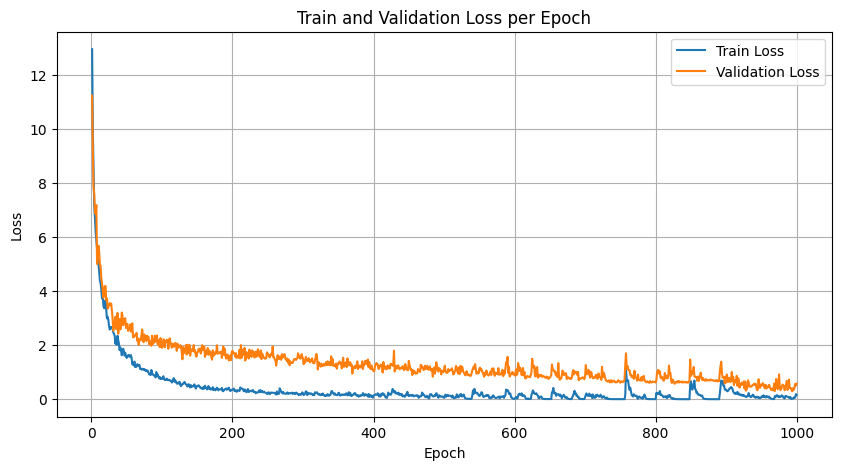

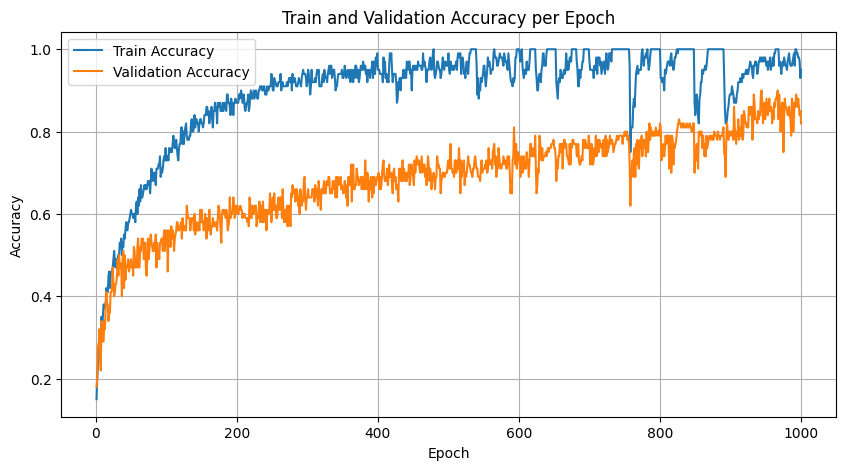

In [10]:
# Extract data using regex
pattern = r"Epoch \[(\d+)/\d+\], Train Loss: ([\d.]+), Train Accuracy: ([\d.]+), Val Loss: ([\d.]+), Val Accuracy: ([\d.]+)"

# Initialize lists for extracted data
epochs, train_loss, train_acc, val_loss, val_acc = [], [], [], [], []
for match in re.finditer(pattern, data):
    epochs.append(int(match.group(1)))
    train_loss.append(float(match.group(2)))
    train_acc.append(float(match.group(3)))
    val_loss.append(float(match.group(4)))
    val_acc.append(float(match.group(5)))

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train and Validation Loss per Epoch")
plt.legend()
plt.grid()
plt.savefig("images/rnn_loss.pdf")
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, label="Train Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train and Validation Accuracy per Epoch")
plt.legend()
plt.grid()
plt.savefig("images/rnn_accuracy.pdf")
plt.show()

In [7]:
! python train.py --input_length 2

Setting total_len to the maximum possible length. 
Epoch [1/1000], Train Loss: 24.3301, Train Accuracy: 0.05, Val Loss: 13.5783, Val Accuracy: 0.05
Epoch [2/1000], Train Loss: 18.5053, Train Accuracy: 0.05, Val Loss: 10.9217, Val Accuracy: 0.20
Epoch [3/1000], Train Loss: 14.4682, Train Accuracy: 0.09, Val Loss: 9.4903, Val Accuracy: 0.05
Epoch [4/1000], Train Loss: 11.1558, Train Accuracy: 0.06, Val Loss: 6.9850, Val Accuracy: 0.20
Epoch [5/1000], Train Loss: 8.0450, Train Accuracy: 0.14, Val Loss: 5.4121, Val Accuracy: 0.25
Epoch [6/1000], Train Loss: 5.9735, Train Accuracy: 0.24, Val Loss: 4.6960, Val Accuracy: 0.20
Epoch [7/1000], Train Loss: 4.7289, Train Accuracy: 0.21, Val Loss: 4.6122, Val Accuracy: 0.25
Epoch [8/1000], Train Loss: 4.0542, Train Accuracy: 0.28, Val Loss: 3.5303, Val Accuracy: 0.30
Epoch [9/1000], Train Loss: 3.0300, Train Accuracy: 0.26, Val Loss: 3.7811, Val Accuracy: 0.15
Epoch [10/1000], Train Loss: 2.6994, Train Accuracy: 0.34, Val Loss: 3.0956, Val Accurac

In [8]:
! python train.py --input_length 4

Setting total_len to the maximum possible length. 
Epoch [1/1000], Train Loss: 10.5846, Train Accuracy: 0.15, Val Loss: 7.3113, Val Accuracy: 0.18
Epoch [2/1000], Train Loss: 6.1360, Train Accuracy: 0.27, Val Loss: 5.3778, Val Accuracy: 0.26
Epoch [3/1000], Train Loss: 4.9527, Train Accuracy: 0.27, Val Loss: 5.1888, Val Accuracy: 0.26
Epoch [4/1000], Train Loss: 4.0911, Train Accuracy: 0.32, Val Loss: 4.7391, Val Accuracy: 0.28
Epoch [5/1000], Train Loss: 3.5432, Train Accuracy: 0.37, Val Loss: 4.1111, Val Accuracy: 0.30
Epoch [6/1000], Train Loss: 3.1301, Train Accuracy: 0.38, Val Loss: 3.6468, Val Accuracy: 0.29
Epoch [7/1000], Train Loss: 2.7638, Train Accuracy: 0.42, Val Loss: 3.4034, Val Accuracy: 0.34
Epoch [8/1000], Train Loss: 2.6083, Train Accuracy: 0.43, Val Loss: 3.7062, Val Accuracy: 0.30
Epoch [9/1000], Train Loss: 2.4933, Train Accuracy: 0.44, Val Loss: 3.2916, Val Accuracy: 0.31
Epoch [10/1000], Train Loss: 2.2923, Train Accuracy: 0.45, Val Loss: 3.1804, Val Accuracy: 0.

In [9]:
! python train.py --input_length 6

Setting total_len to the maximum possible length. 
Epoch [1/1000], Train Loss: 10.1903, Train Accuracy: 0.15, Val Loss: 8.0470, Val Accuracy: 0.20
Epoch [2/1000], Train Loss: 7.4506, Train Accuracy: 0.21, Val Loss: 6.8686, Val Accuracy: 0.24
Epoch [3/1000], Train Loss: 6.2862, Train Accuracy: 0.26, Val Loss: 6.0796, Val Accuracy: 0.25
Epoch [4/1000], Train Loss: 5.6291, Train Accuracy: 0.26, Val Loss: 5.4317, Val Accuracy: 0.28
Epoch [5/1000], Train Loss: 4.8937, Train Accuracy: 0.31, Val Loss: 4.7575, Val Accuracy: 0.30
Epoch [6/1000], Train Loss: 4.3688, Train Accuracy: 0.33, Val Loss: 4.4161, Val Accuracy: 0.32
Epoch [7/1000], Train Loss: 3.8333, Train Accuracy: 0.35, Val Loss: 3.6706, Val Accuracy: 0.36
Epoch [8/1000], Train Loss: 3.4400, Train Accuracy: 0.37, Val Loss: 3.5775, Val Accuracy: 0.37
Epoch [9/1000], Train Loss: 3.1656, Train Accuracy: 0.38, Val Loss: 3.1586, Val Accuracy: 0.38
Epoch [10/1000], Train Loss: 2.9749, Train Accuracy: 0.38, Val Loss: 2.8061, Val Accuracy: 0.

In [10]:
! python train.py --input_length 8

Setting total_len to the maximum possible length. 
Epoch [1/1000], Train Loss: 10.4392, Train Accuracy: 0.13, Val Loss: 8.5541, Val Accuracy: 0.15
Epoch [2/1000], Train Loss: 7.2280, Train Accuracy: 0.17, Val Loss: 6.0902, Val Accuracy: 0.18
Epoch [3/1000], Train Loss: 5.1414, Train Accuracy: 0.20, Val Loss: 4.4939, Val Accuracy: 0.20
Epoch [4/1000], Train Loss: 3.8871, Train Accuracy: 0.20, Val Loss: 3.4552, Val Accuracy: 0.20
Epoch [5/1000], Train Loss: 2.8855, Train Accuracy: 0.21, Val Loss: 2.5284, Val Accuracy: 0.21
Epoch [6/1000], Train Loss: 2.3220, Train Accuracy: 0.22, Val Loss: 2.1712, Val Accuracy: 0.22
Epoch [7/1000], Train Loss: 2.0333, Train Accuracy: 0.25, Val Loss: 1.9305, Val Accuracy: 0.27
Epoch [8/1000], Train Loss: 1.8543, Train Accuracy: 0.29, Val Loss: 1.7834, Val Accuracy: 0.31
Epoch [9/1000], Train Loss: 1.7518, Train Accuracy: 0.32, Val Loss: 1.7040, Val Accuracy: 0.33
Epoch [10/1000], Train Loss: 1.6442, Train Accuracy: 0.34, Val Loss: 1.6942, Val Accuracy: 0.

In [11]:
! python train.py --input_length 10

Epoch [1/1000], Train Loss: 4.4840, Train Accuracy: 0.13, Val Loss: 2.1633, Val Accuracy: 0.18
Epoch [2/1000], Train Loss: 2.0564, Train Accuracy: 0.20, Val Loss: 1.9975, Val Accuracy: 0.21
Epoch [3/1000], Train Loss: 1.9854, Train Accuracy: 0.21, Val Loss: 1.9648, Val Accuracy: 0.22
Epoch [4/1000], Train Loss: 1.6496, Train Accuracy: 0.31, Val Loss: 1.3956, Val Accuracy: 0.37
Epoch [5/1000], Train Loss: 1.0759, Train Accuracy: 0.49, Val Loss: 0.7905, Val Accuracy: 0.61
Epoch [6/1000], Train Loss: 0.5223, Train Accuracy: 0.75, Val Loss: 0.2305, Val Accuracy: 0.92
Epoch [7/1000], Train Loss: 0.1423, Train Accuracy: 0.96, Val Loss: 0.2393, Val Accuracy: 0.93
Epoch [8/1000], Train Loss: 0.1040, Train Accuracy: 0.97, Val Loss: 0.1722, Val Accuracy: 0.89
Epoch [9/1000], Train Loss: 0.1787, Train Accuracy: 0.91, Val Loss: 0.1442, Val Accuracy: 0.90
Epoch [10/1000], Train Loss: 0.1578, Train Accuracy: 0.93, Val Loss: 0.0109, Val Accuracy: 1.00
Epoch [11/1000], Train Loss: 0.1039, Train Accura

In [12]:
! python train.py --input_length 12

Epoch [1/1000], Train Loss: 4.7805, Train Accuracy: 0.12, Val Loss: 2.2950, Val Accuracy: 0.13
Epoch [2/1000], Train Loss: 2.2817, Train Accuracy: 0.14, Val Loss: 2.2747, Val Accuracy: 0.14
Epoch [3/1000], Train Loss: 2.2762, Train Accuracy: 0.14, Val Loss: 2.2903, Val Accuracy: 0.13
Epoch [4/1000], Train Loss: 2.2764, Train Accuracy: 0.14, Val Loss: 2.2761, Val Accuracy: 0.14
Epoch [5/1000], Train Loss: 2.2446, Train Accuracy: 0.15, Val Loss: 2.2029, Val Accuracy: 0.17
Epoch [6/1000], Train Loss: 2.2219, Train Accuracy: 0.16, Val Loss: 2.2473, Val Accuracy: 0.15
Epoch [7/1000], Train Loss: 2.1758, Train Accuracy: 0.17, Val Loss: 2.1054, Val Accuracy: 0.19
Epoch [8/1000], Train Loss: 2.0847, Train Accuracy: 0.19, Val Loss: 2.0631, Val Accuracy: 0.20
Epoch [9/1000], Train Loss: 2.0109, Train Accuracy: 0.20, Val Loss: 1.9877, Val Accuracy: 0.21
Epoch [10/1000], Train Loss: 2.0331, Train Accuracy: 0.21, Val Loss: 2.1036, Val Accuracy: 0.19
Epoch [11/1000], Train Loss: 2.0218, Train Accura

In [13]:
! python train.py --input_length 14

Epoch [1/1000], Train Loss: 4.8697, Train Accuracy: 0.12, Val Loss: 2.2779, Val Accuracy: 0.14
Epoch [2/1000], Train Loss: 2.2729, Train Accuracy: 0.14, Val Loss: 2.2855, Val Accuracy: 0.13
Epoch [3/1000], Train Loss: 2.2853, Train Accuracy: 0.13, Val Loss: 2.2744, Val Accuracy: 0.14
Epoch [4/1000], Train Loss: 2.2711, Train Accuracy: 0.14, Val Loss: 2.2652, Val Accuracy: 0.14
Epoch [5/1000], Train Loss: 2.2606, Train Accuracy: 0.14, Val Loss: 2.2595, Val Accuracy: 0.14
Epoch [6/1000], Train Loss: 2.2555, Train Accuracy: 0.14, Val Loss: 2.2953, Val Accuracy: 0.12
Epoch [7/1000], Train Loss: 2.2715, Train Accuracy: 0.14, Val Loss: 2.2597, Val Accuracy: 0.14
Epoch [8/1000], Train Loss: 2.2782, Train Accuracy: 0.13, Val Loss: 2.2626, Val Accuracy: 0.14
Epoch [9/1000], Train Loss: 2.2580, Train Accuracy: 0.14, Val Loss: 2.2296, Val Accuracy: 0.15
Epoch [10/1000], Train Loss: 2.2380, Train Accuracy: 0.15, Val Loss: 2.2201, Val Accuracy: 0.16
Epoch [11/1000], Train Loss: 2.2300, Train Accura

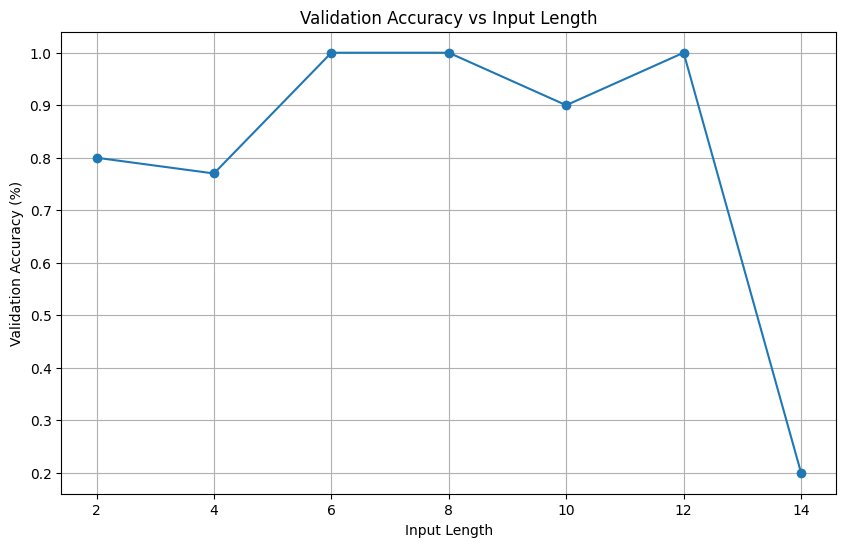

In [15]:
import matplotlib.pyplot as plt

input_lengths = [2, 4, 6, 8, 10, 12, 14]
val_accuracies = [0.80, 0.77, 1.0, 1.0, 0.9, 1.0, 0.2]

# 绘制图表
plt.figure(figsize=(10, 6))
plt.plot(input_lengths, val_accuracies, marker='o')
plt.xlabel('Input Length')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy vs Input Length')
plt.grid(True)
plt.savefig("images/val_accuracy_vs_input_length.pdf")
plt.show()